In [1]:
## bibliotecas
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
## ler a base de dados
bdprint = pd.read_json(r'https://www.ticdemestre.com.br/estacao/consulta_dados?data_est=291&data_senha=Fatec@291&data_ini=2021-01-01&data_fim=2021-12-31')

In [3]:
### mostrar a base de dados
bdprint

medUmidade  medTemp  medCO              medData
0            47.9     24.5    741  2021-09-13 11:50:30
1            37.0     33.8    669  2021-09-13 11:51:30
2            36.8     33.8    649  2021-09-13 11:52:28
3            36.2     33.8    631  2021-09-13 11:53:27
4            36.0     33.8    617  2021-09-13 11:54:27
...           ...      ...    ...                  ...
22007        60.5     28.3    688  2021-11-17 23:52:21
22008        60.5     28.3    682  2021-11-17 23:53:27
22009        60.6     28.4    679  2021-11-17 23:54:25
22010        60.6     28.4    677  2021-11-17 23:55:23
22011        60.7     28.4    679  2021-11-17 23:56:21

[22012 rows x 4 columns]

In [4]:
### Para metodo avaliativo contar quantidade de zeros na base
print((bdprint == 0).sum(axis = 0))

medUmidade    4
medTemp       4
medCO         1
medData       0
dtype: int64


In [3]:
## Não utilizar os valores 0
bdprint = bdprint.replace(0, np.NaN)

In [6]:
## função que mostra dados estatisticos pertinentes 
bdprint.describe()

medUmidade       medTemp         medCO
count  22008.000000  22008.000000  22011.000000
mean      49.775050     28.749128    723.160511
std       14.798037      4.507547    101.390631
min       16.700000     17.500000     65.000000
25%       38.400000     25.200000    679.000000
50%       50.000000     28.400000    735.000000
75%       61.600000     32.200000    777.000000
max       84.100000     41.900000   2187.000000

In [4]:
###marca a coluna meddata e registrar ela com a biblioteca datetime
bdprint['medData'] = pd.to_datetime(bdprint['medData'])

# Média Temperatura

Text(0.5, 1.0, 'Temperatura')

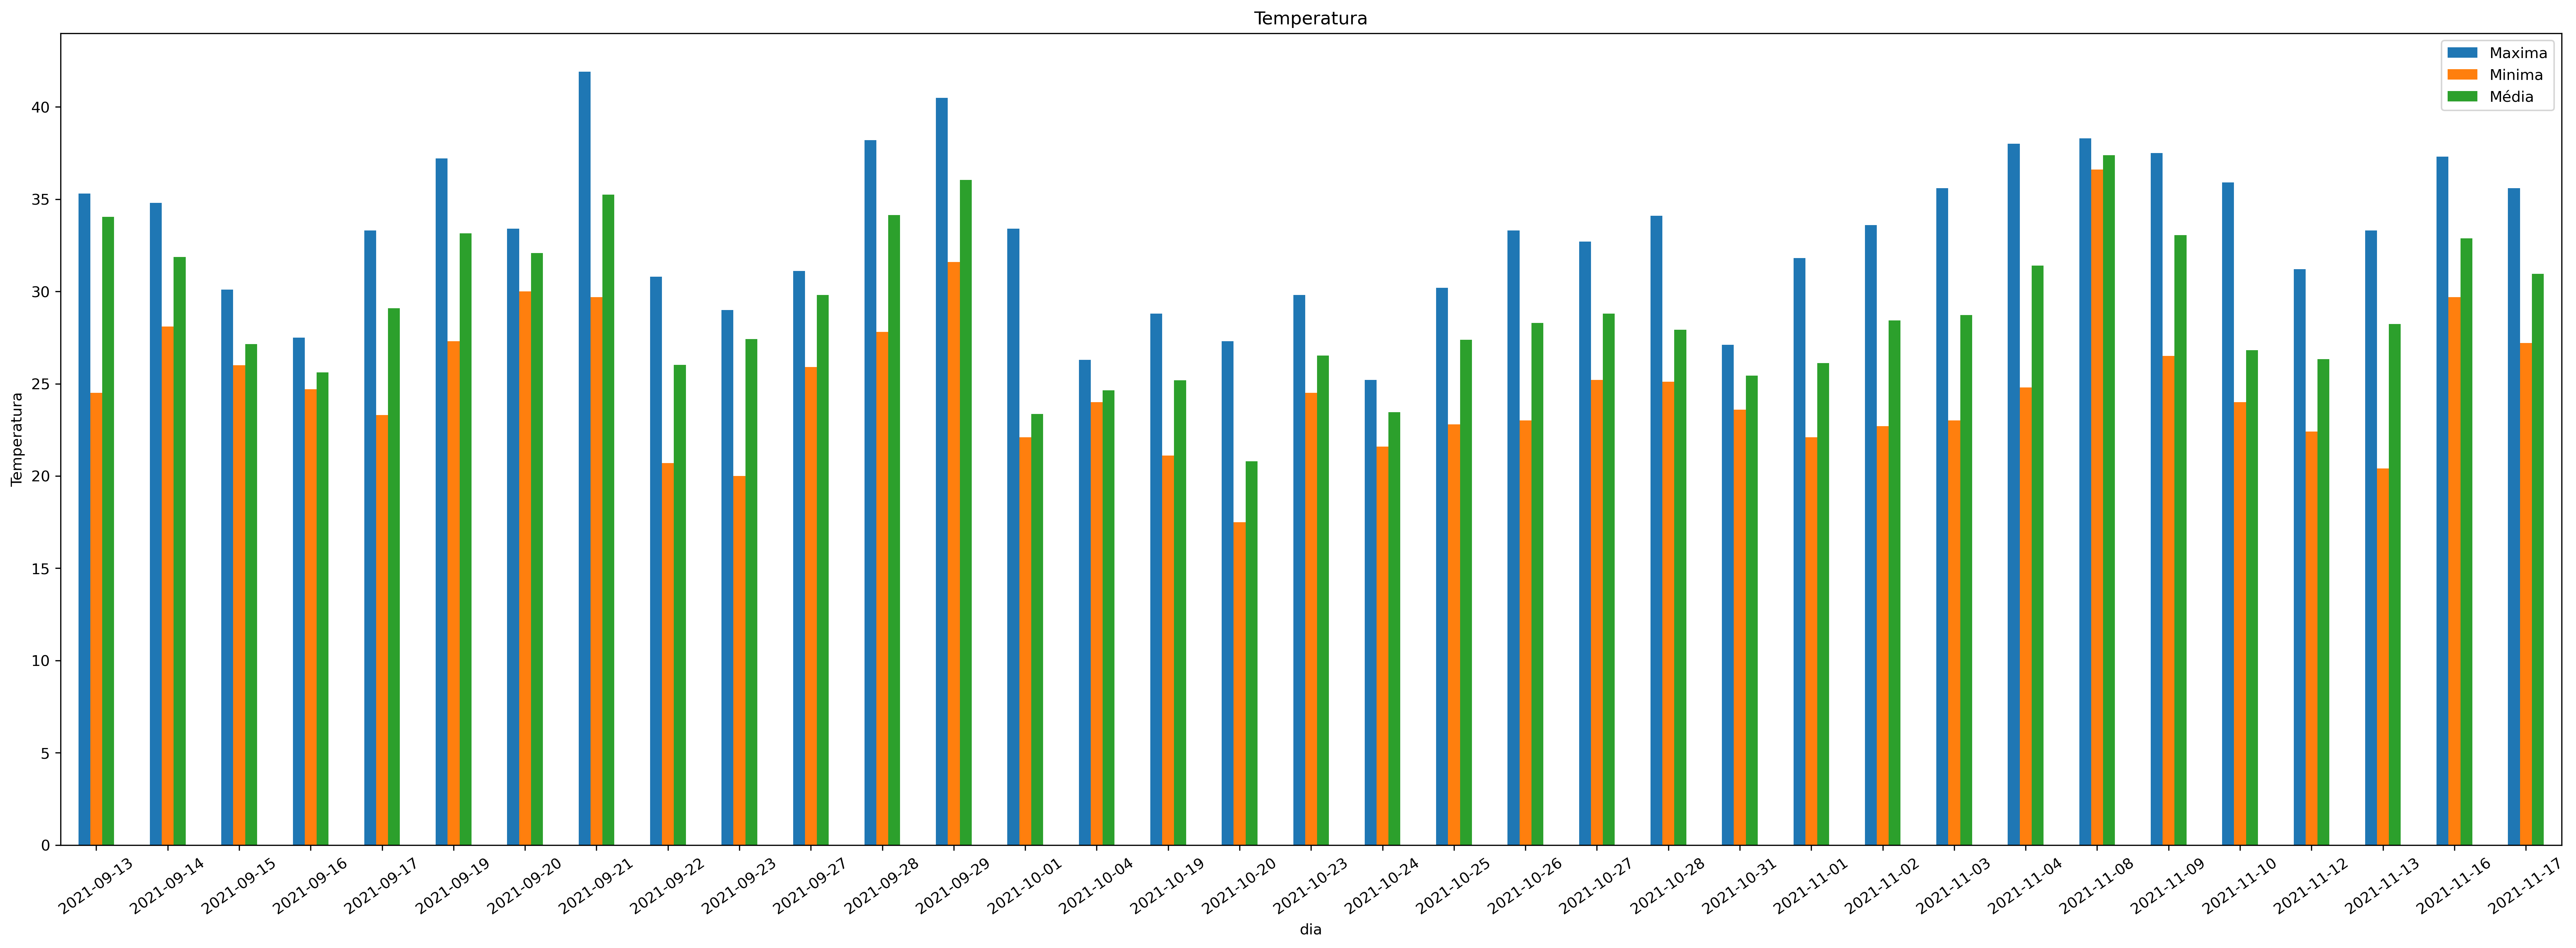

In [9]:
## Temperatura maxima, minima e média
bdprint.groupby([bdprint['medData'].dt.to_period('d')]).aggregate({'medTemp':[np.max,np.min,np.mean]}).plot.bar(figsize=(30, 10))
plt.gcf().set_dpi(300)
plt.xlabel("dia");
plt.ylabel("Temperatura");
plt.legend( ['Maxima', 'Minima', 'Média'])
plt.xticks(rotation=35)
plt.title('Temperatura')

In [9]:
## tabela gerada da função group By com calculo da media, maxima e minima por Dia.
bdprint.groupby([bdprint['medData'].dt.to_period('d')]).aggregate({'medTemp':[np.max,np.min,np.mean]}) 

medTemp                 
              amax  amin       mean
medData                            
2021-09-13    35.3  24.5  34.038384
2021-09-14    34.8  28.1  31.872566
2021-09-15    30.1  26.0  27.149547
2021-09-16    27.5  24.7  25.614286
2021-09-17    33.3  23.3  29.082778
2021-09-19    37.2  27.3  33.157661
2021-09-20    33.4  30.0  32.078626
2021-09-21    41.9  29.7  35.246579
2021-09-22    30.8  20.7  26.017042
2021-09-23    29.0  20.0  27.420930
2021-09-27    31.1  25.9  29.800000
2021-09-28    38.2  27.8  34.144418
2021-09-29    40.5  31.6  36.040663
2021-10-01    33.4  22.1  23.356481
2021-10-04    26.3  24.0  24.648372
2021-10-19    28.8  21.1  25.176601
2021-10-20    27.3  17.5  20.787985
2021-10-23    29.8  24.5  26.522857
2021-10-24    25.2  21.6  23.463710
2021-10-25    30.2  22.8  27.371795
2021-10-26    33.3  23.0  28.284655
2021-10-27    32.7  25.2  28.788139
2021-10-28    34.1  25.1  27.915108
2021-10-31    27.1  23.6  25.435666
2021-11-01    31.8  22.1  26.113001
2021-11-02    33.6  22.7  28.429448
2021-11-03    35.6  23.0  28.727970
2021-11-04    38.0  24.8  31.393049
2021-11-08    38.3  36.6  37.377987
2021-11-09    37.5  26.5  33.053823
2021-11-10    35.9  24.0  26.813673
2021-11-12    31.2  22.4  26.331988
2021-11-13    33.3  20.4  28.228708
2021-11-16    37.3  29.7  32.873013
2021-11-17    35.6  27.2  30.954303

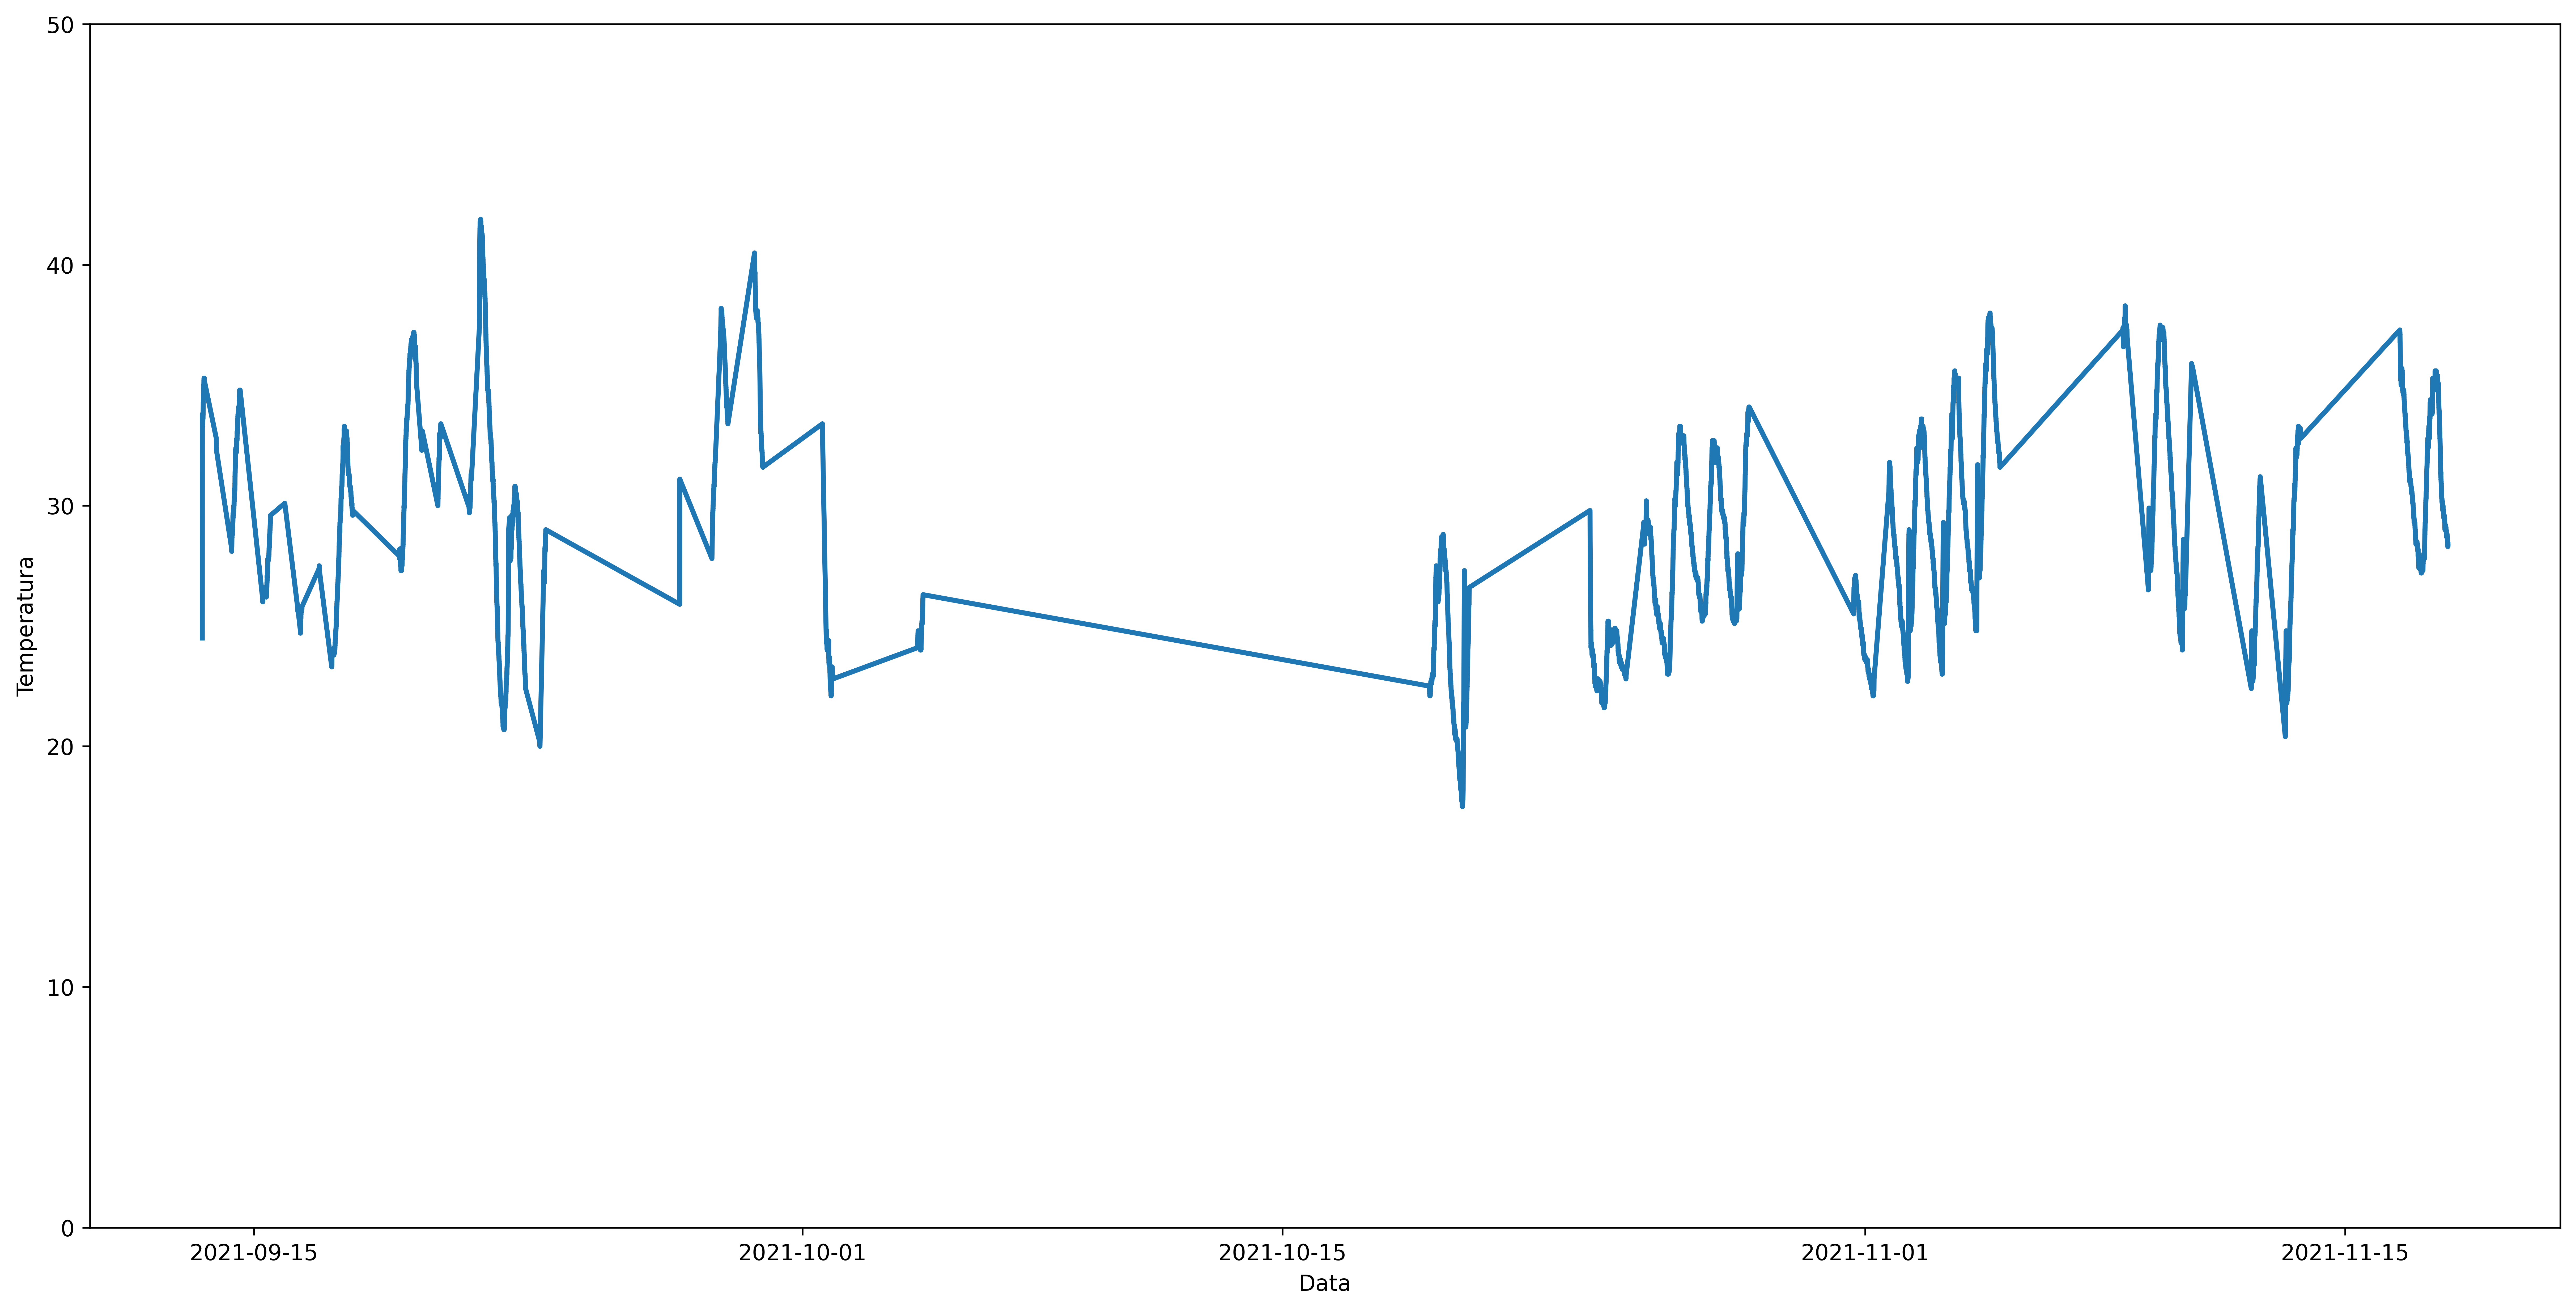

In [10]:
# Grafico contendo cada dado da Temperatura Registrado na base de Dados
fig, ax = plt.subplots(dpi=600)
seaborn.set_context("talk")
fig.set_size_inches(20, 10)
res = seaborn.lineplot(x="medData", y="medTemp", data=bdprint)
ax.set(ylim=(0, 50),xlabel='Data', ylabel='Temperatura')
plt.show()

# Média Umidade

Text(0.5, 1.0, 'Umidade')

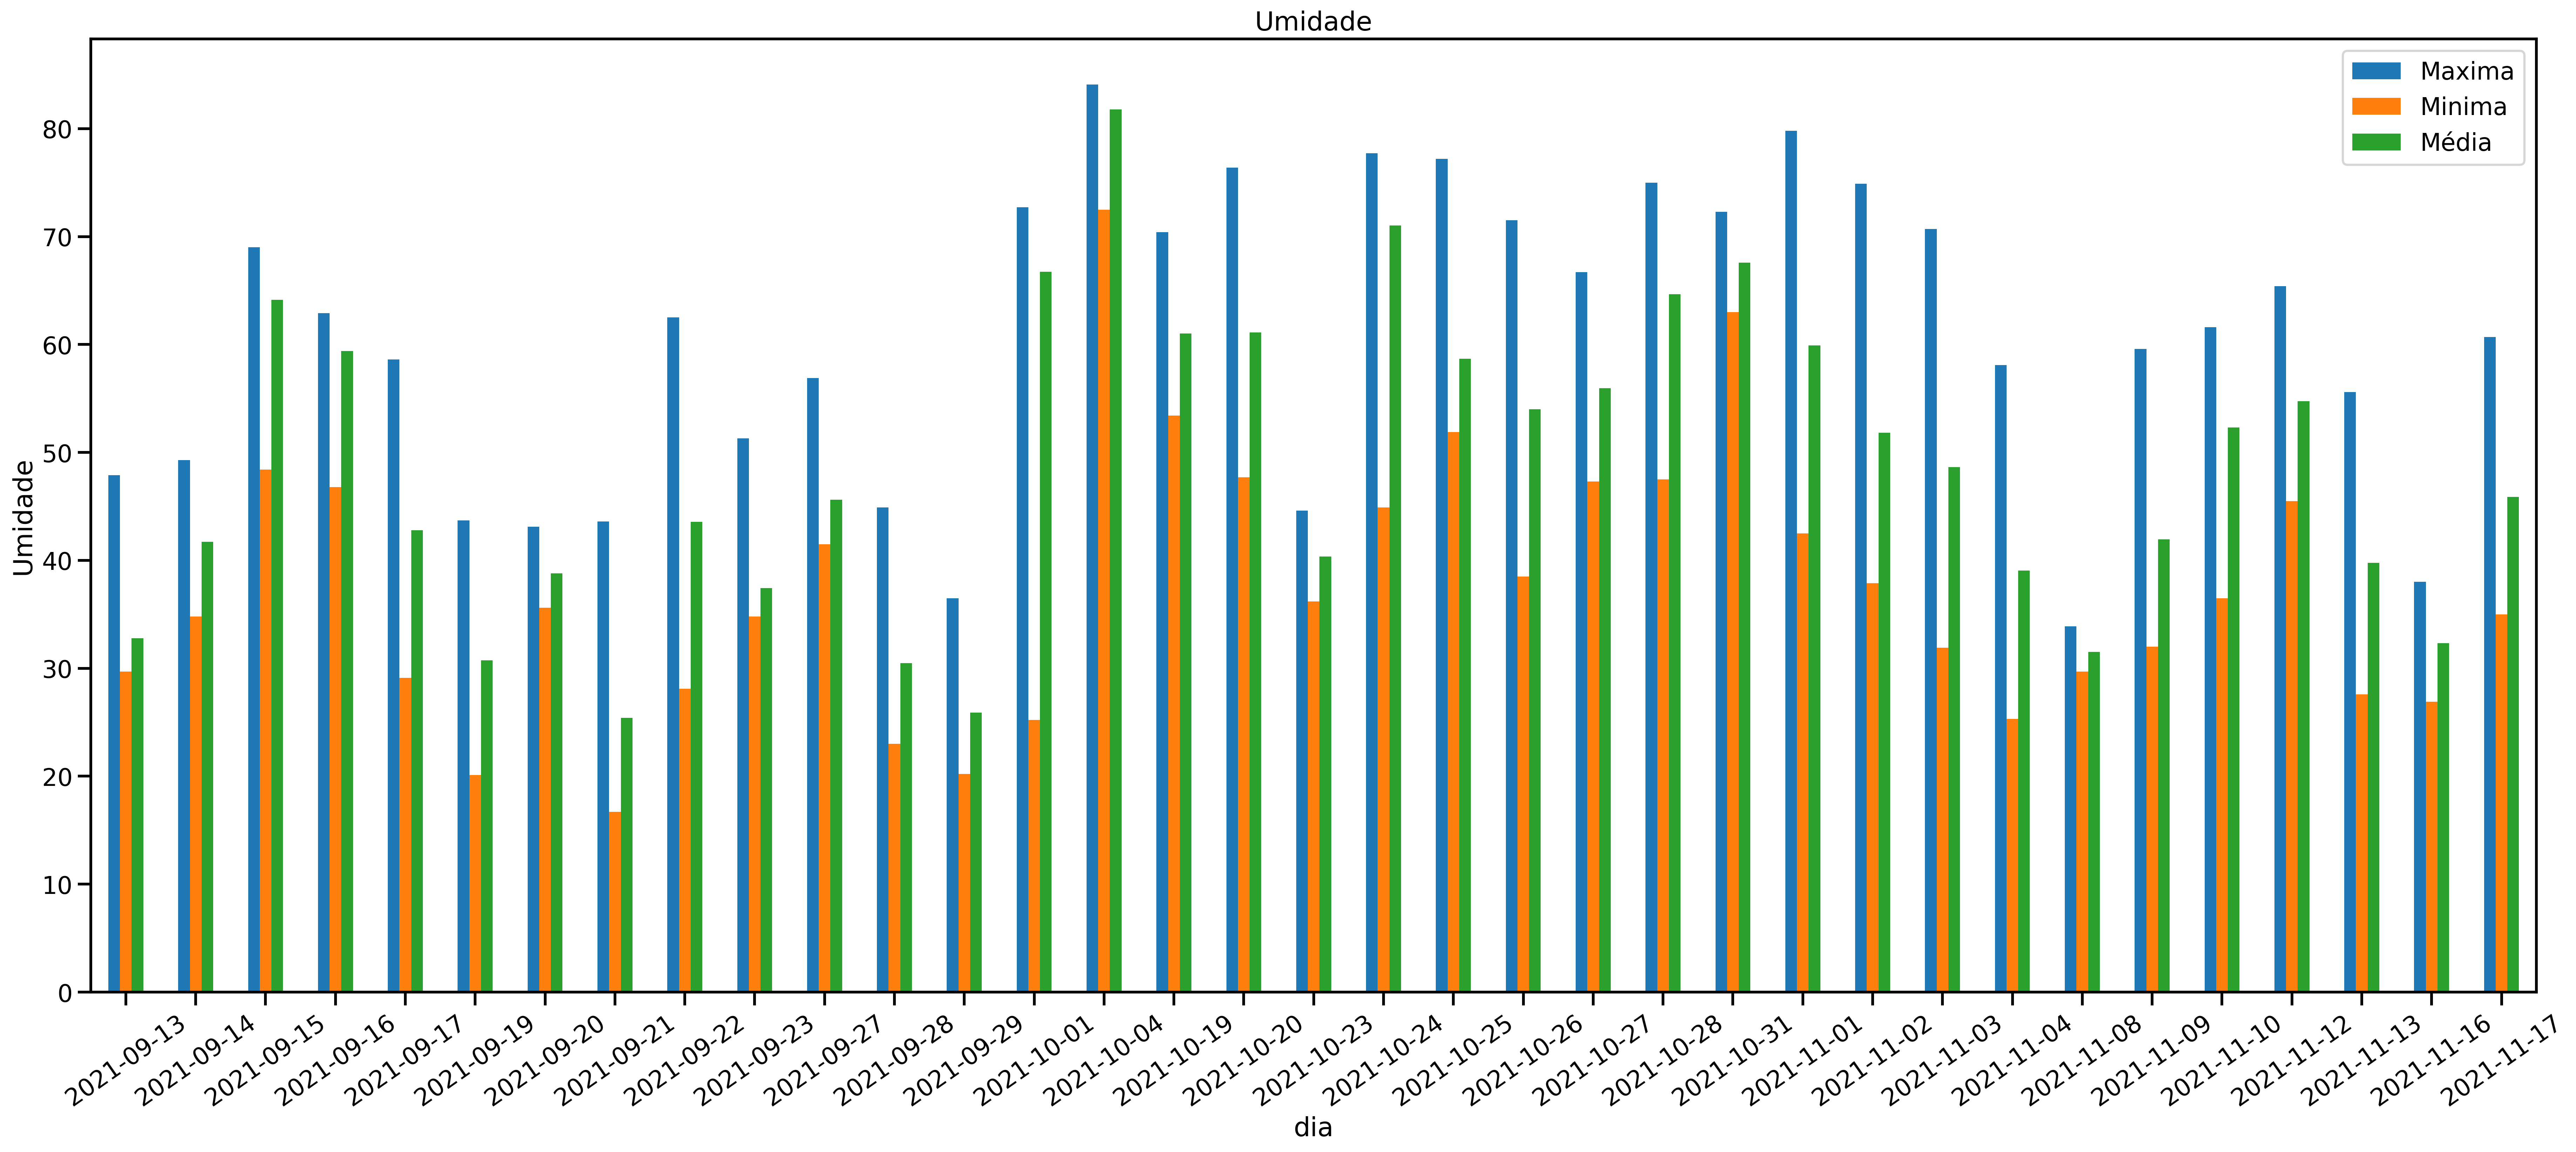

In [11]:
## Umidade maxima, minima e média
bdprint.groupby([bdprint['medData'].dt.to_period('d')]).aggregate({'medUmidade':[np.max,np.min,np.mean]}) .plot.bar(figsize=(30, 12))
plt.xlabel("dia")
plt.gcf().set_dpi(300)
plt.ylabel("Umidade");
plt.legend( ['Maxima', 'Minima', 'Média'])
plt.xticks(rotation=35)
plt.title('Umidade')

In [12]:
## tabela gerada da função group By com calculo da media, maxima e minima por Dia.
bdprint.groupby([bdprint['medData'].dt.to_period('d')]).aggregate({'medUmidade':[np.max,np.min,np.mean]})

medUmidade                 
                 amax  amin       mean
medData                               
2021-09-13       47.9  29.7  32.791919
2021-09-14       49.3  34.8  41.723894
2021-09-15       69.0  48.4  64.138369
2021-09-16       62.9  46.8  59.391667
2021-09-17       58.6  29.1  42.785333
2021-09-19       43.7  20.1  30.750134
2021-09-20       43.1  35.6  38.785496
2021-09-21       43.6  16.7  25.423581
2021-09-22       62.5  28.1  43.561073
2021-09-23       51.3  34.8  37.434884
2021-09-27       56.9  41.5  45.625000
2021-09-28       44.9  23.0  30.476485
2021-09-29       36.5  20.2  25.883434
2021-10-01       72.7  25.2  66.728241
2021-10-04       84.1  72.5  81.775349
2021-10-19       70.4  53.4  61.031083
2021-10-20       76.4  47.7  61.103142
2021-10-23       44.6  36.2  40.354286
2021-10-24       77.7  44.9  71.034368
2021-10-25       77.2  51.9  58.670353
2021-10-26       71.5  38.5  53.992291
2021-10-27       66.7  47.3  55.960489
2021-10-28       75.0  47.5  64.639568
2021-10-31       72.3  63.0  67.592099
2021-11-01       79.8  42.5  59.907192
2021-11-02       74.9  37.9  51.831365
2021-11-03       70.7  31.9  48.634541
2021-11-04       58.1  25.3  39.057203
2021-11-08       33.9  29.7  31.515094
2021-11-09       59.6  32.0  41.948828
2021-11-10       61.6  36.5  52.294082
2021-11-12       65.4  45.5  54.740994
2021-11-13       55.6  27.6  39.767943
2021-11-16       38.0  26.9  32.315342
2021-11-17       60.7  35.0  45.876780

In [13]:
# Grafico contendo cada dado da Umidade Registrado na base de Dados
fig, ax = plt.subplots(dpi=600)
seaborn.set_context("talk")
fig.set_size_inches(20, 10)
res = seaborn.lineplot(x="medData", y="medUmidade", data=bdprint)
ax.set(ylim=(0, 90),xlabel='Data', ylabel='Umidade')
plt.show()

# Média CO2

Text(0.5, 1.0, 'Co2')

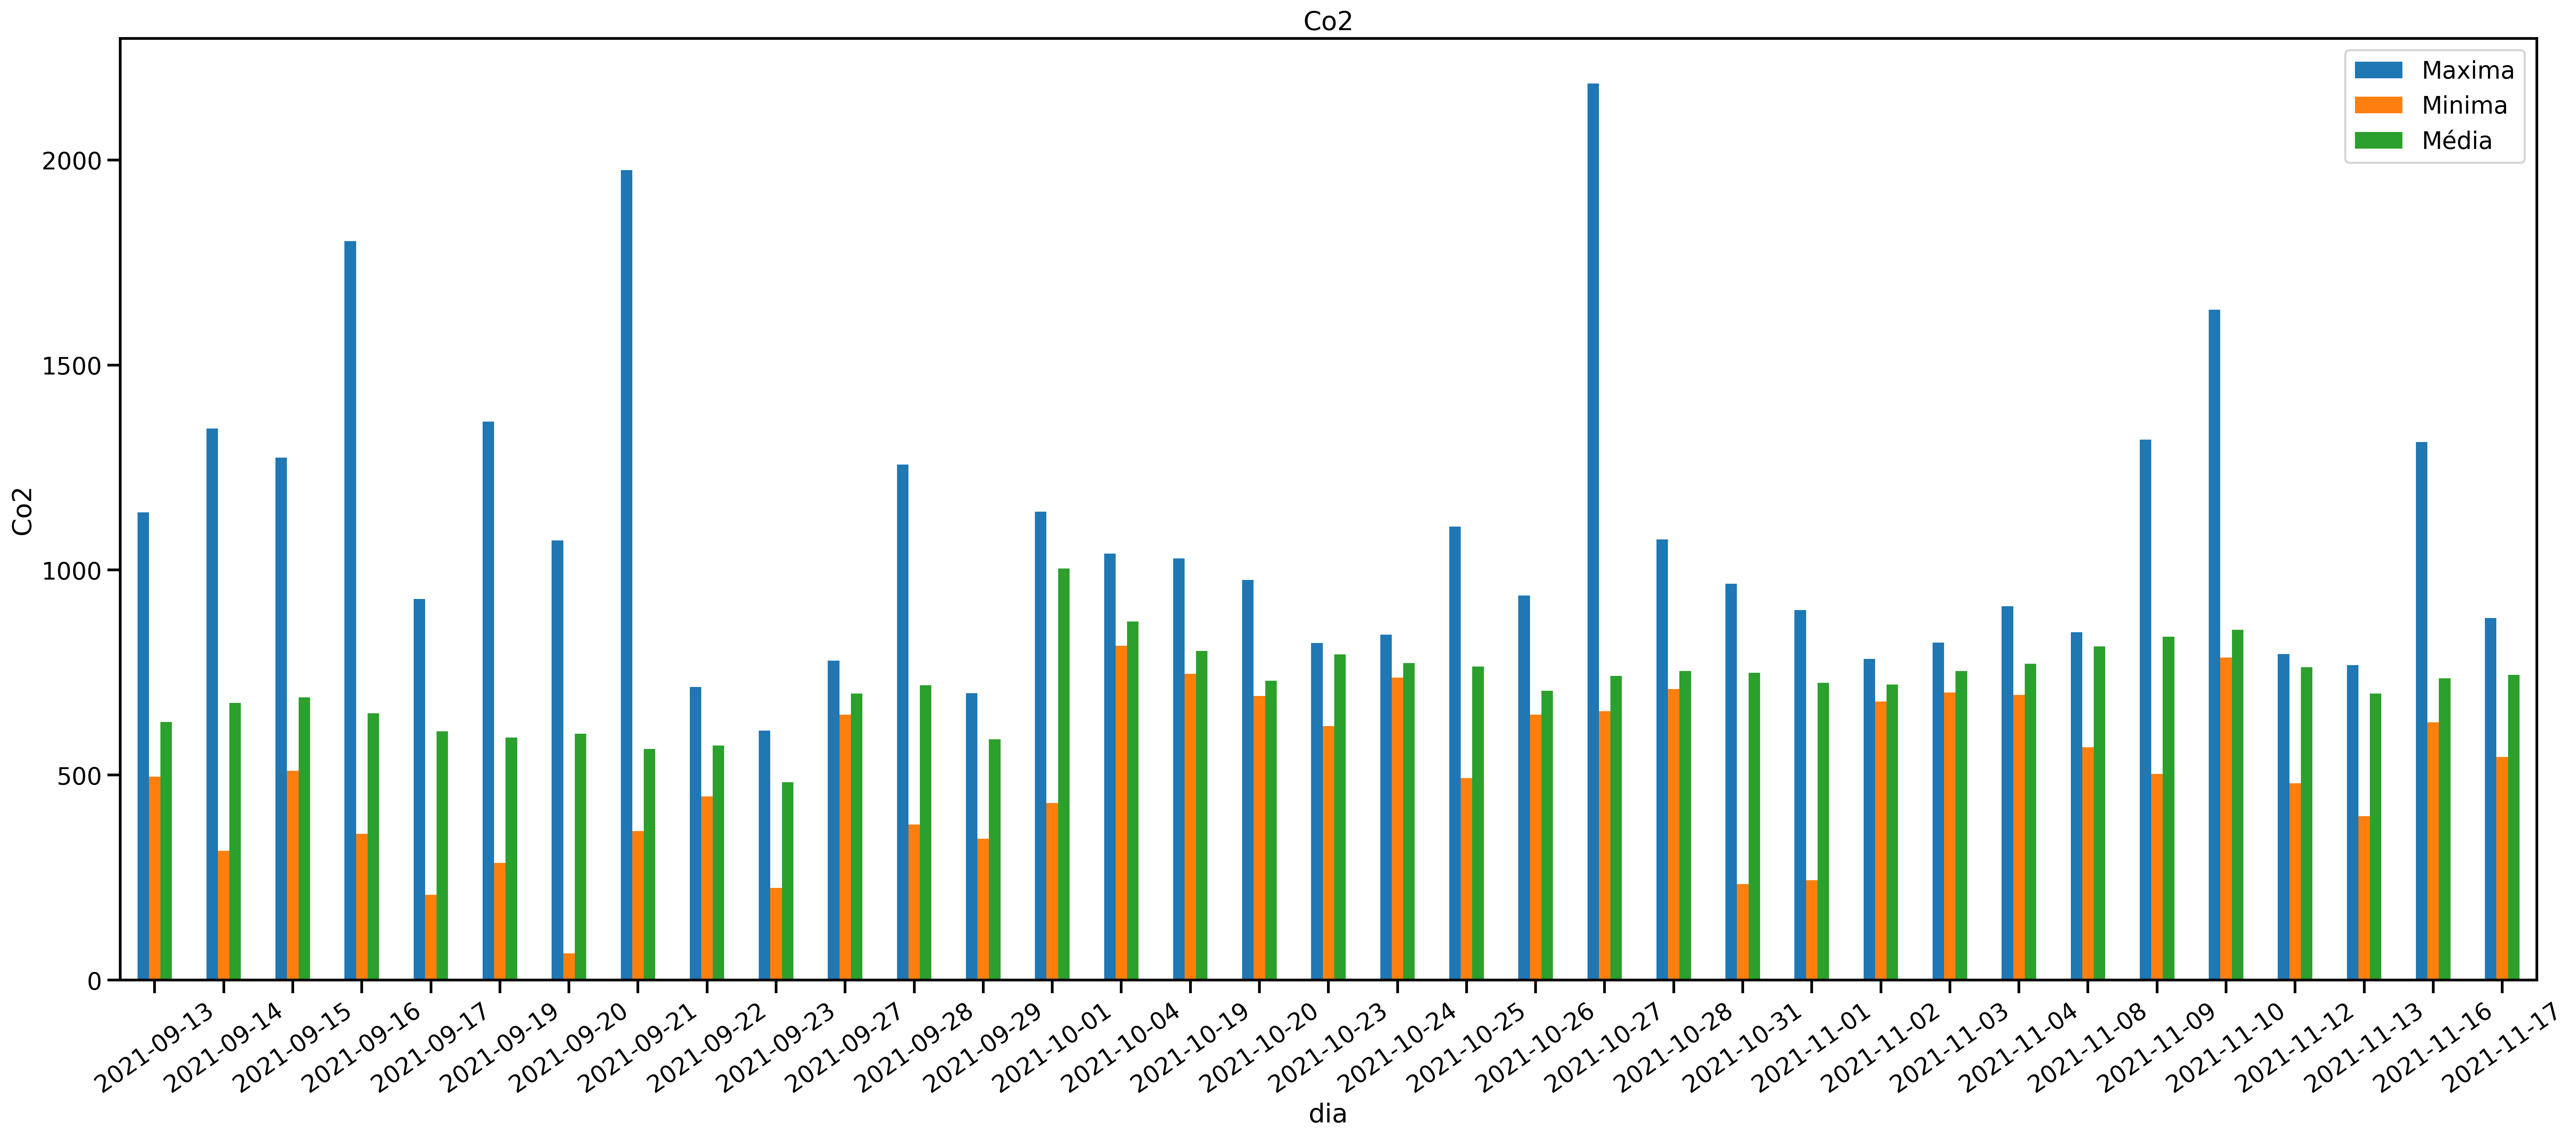

In [14]:
## Co2 maxima, minima e média
bdprint.groupby([bdprint['medData'].dt.to_period('d')]).aggregate({'medCO':[np.max,np.min,np.mean]}) .plot.bar(figsize=(30, 12))
plt.xlabel("dia");
plt.gcf().set_dpi(300)
plt.ylabel("Co2");
plt.legend( ['Maxima', 'Minima', 'Média'])
plt.xticks(rotation=35)
plt.title('Co2')

In [15]:
## tabela gerada da função group By com calculo da media, maxima e minima por Dia.
bdprint.groupby([bdprint['medData'].dt.to_period('d')]).aggregate({'medCO':[np.max,np.min,np.mean]})

medCO                    
              amax   amin         mean
medData                               
2021-09-13  1141.0  496.0   629.767677
2021-09-14  1345.0  315.0   676.238938
2021-09-15  1274.0  510.0   689.749245
2021-09-16  1802.0  357.0   650.440476
2021-09-17   929.0  208.0   606.304107
2021-09-19  1362.0  286.0   591.168237
2021-09-20  1072.0   65.0   600.725191
2021-09-21  1975.0  363.0   563.340116
2021-09-22   715.0  448.0   571.645329
2021-09-23   608.0  225.0   482.744186
2021-09-27   779.0  647.0   698.500000
2021-09-28  1257.0  379.0   718.655582
2021-09-29   700.0  345.0   587.361446
2021-10-01  1142.0  432.0  1003.611111
2021-10-04  1040.0  815.0   874.708333
2021-10-19  1028.0  747.0   802.562282
2021-10-20   976.0  693.0   729.831793
2021-10-23   822.0  619.0   793.885714
2021-10-24   842.0  738.0   773.321508
2021-10-25  1106.0  493.0   764.254808
2021-10-26   938.0  647.0   705.879170
2021-10-27  2187.0  656.0   741.916976
2021-10-28  1075.0  710.0   753.621103
2021-10-31   967.0  234.0   749.338600
2021-11-01   902.0  243.0   724.946058
2021-11-02   783.0  679.0   720.516871
2021-11-03   823.0  701.0   753.476832
2021-11-04   912.0  695.0   771.086265
2021-11-08   848.0  568.0   813.723270
2021-11-09  1318.0  503.0   837.723751
2021-11-10  1635.0  787.0   854.138776
2021-11-12   795.0  480.0   762.658385
2021-11-13   768.0  400.0   698.794258
2021-11-16  1312.0  629.0   735.650647
2021-11-17   883.0  544.0   744.110452

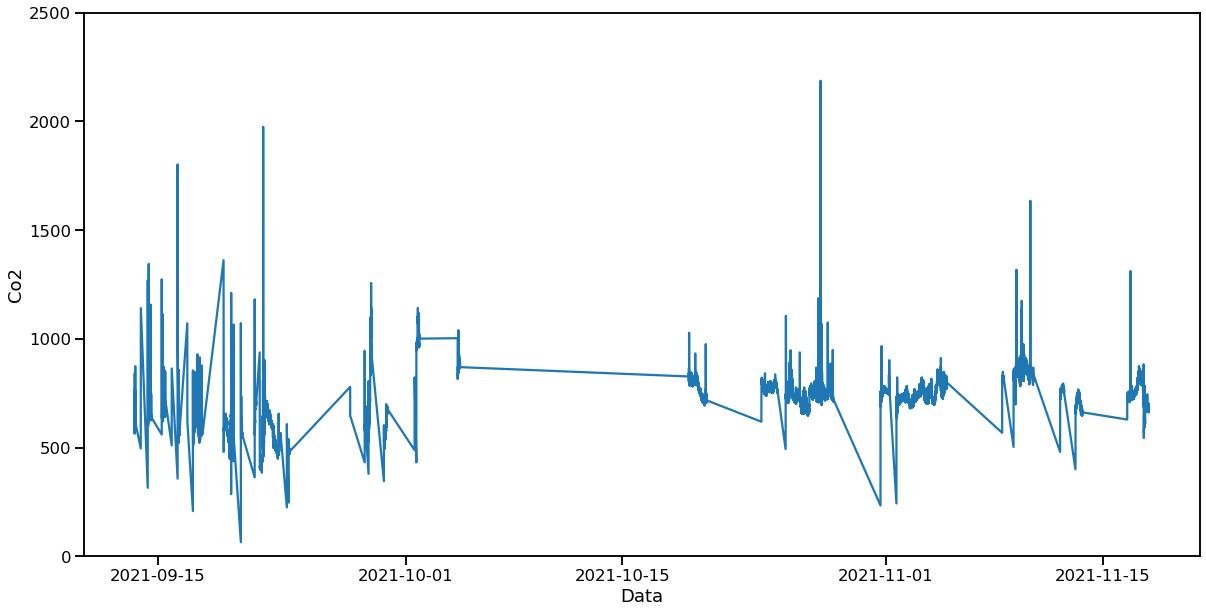

In [16]:
# Grafico contendo cada dado da Co2 Registrado na base de Dados
fig, ax = plt.subplots()
seaborn.set_context("talk")
fig.set_size_inches(20, 10)
res = seaborn.lineplot(x="medData", y="medCO", data=bdprint)
ax.set(ylim=(0,2500),xlabel='Data', ylabel='Co2')
plt.show()

# Média:Temperatura e Umidade

<ipython-input-17-515fb9d2cc6b>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp','medUmidade'].mean().plot(rot=0, ax=axs)


(array([18883, 18901, 18932, 18948], dtype=int64),
 <a list of 4 Text major ticklabel objects>)

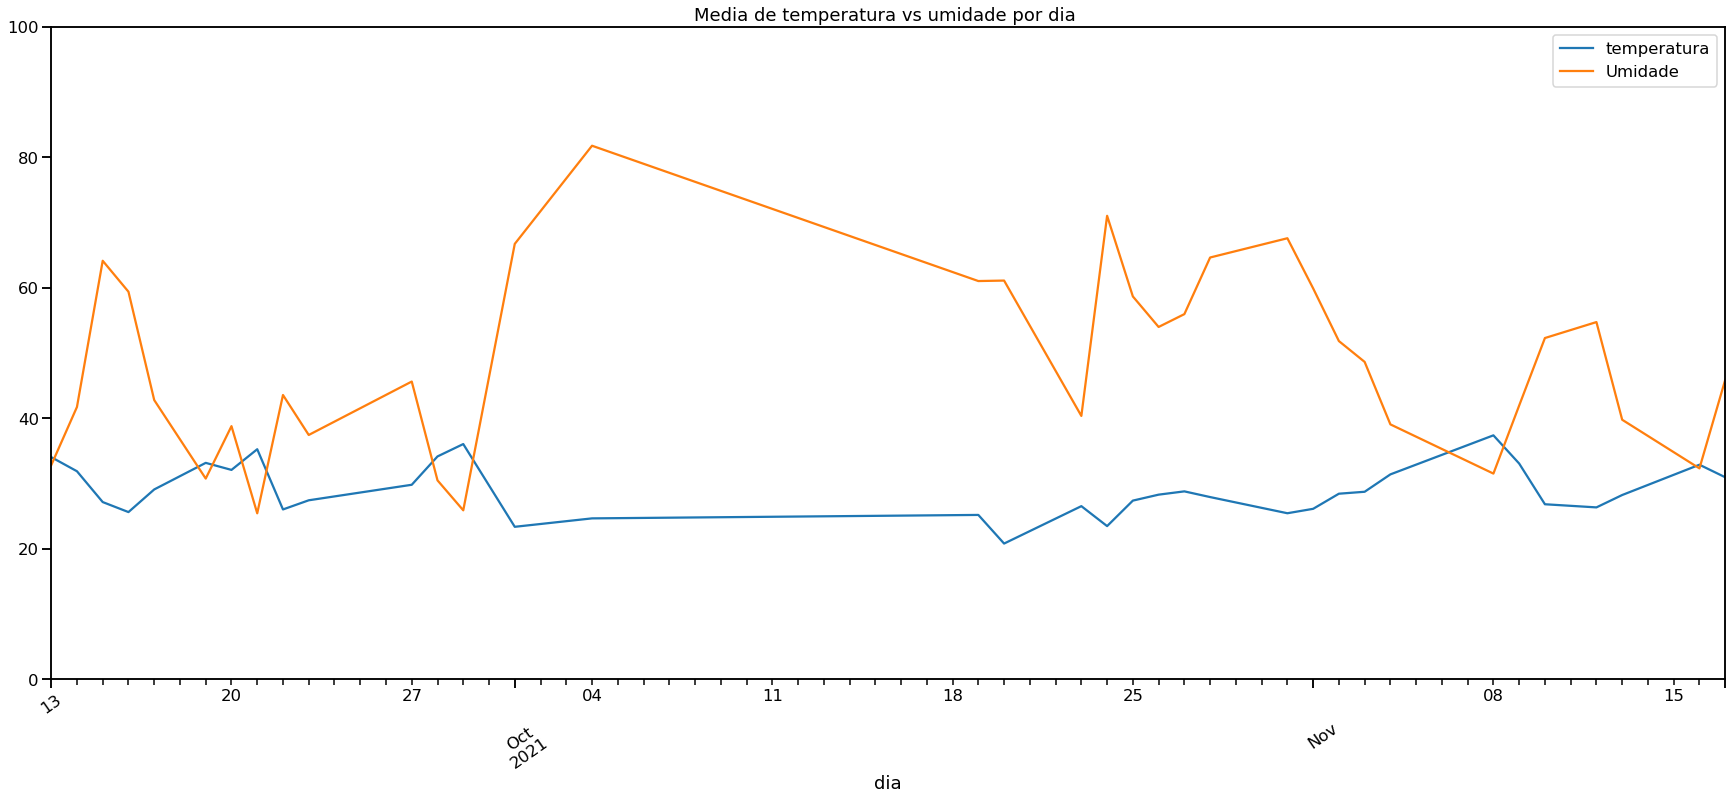

In [17]:
## Media de temperatura e Umidade por dia

fig, axs = plt.subplots(figsize=(30, 12))
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp','medUmidade'].mean().plot(rot=0, ax=axs)
plt.xlabel("dia");

plt.title('Media de temperatura vs umidade por dia ')
plt.legend( ['temperatura', 'Umidade'])
axs.set_ylim(ymin=0,ymax=100)
plt.xticks(rotation=35)

In [18]:
## tabela gerada da função group By com calculo da media de temperatura e Umidade por Dia.
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp','medUmidade'].mean()

<ipython-input-18-0c5a86d198ee>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp','medUmidade'].mean()


medTemp  medUmidade
medData                          
2021-09-13  34.038384   32.791919
2021-09-14  31.872566   41.723894
2021-09-15  27.149547   64.138369
2021-09-16  25.614286   59.391667
2021-09-17  29.082778   42.785333
2021-09-19  33.157661   30.750134
2021-09-20  32.078626   38.785496
2021-09-21  35.246579   25.423581
2021-09-22  26.017042   43.561073
2021-09-23  27.420930   37.434884
2021-09-27  29.800000   45.625000
2021-09-28  34.144418   30.476485
2021-09-29  36.040663   25.883434
2021-10-01  23.356481   66.728241
2021-10-04  24.648372   81.775349
2021-10-19  25.176601   61.031083
2021-10-20  20.787985   61.103142
2021-10-23  26.522857   40.354286
2021-10-24  23.463710   71.034368
2021-10-25  27.371795   58.670353
2021-10-26  28.284655   53.992291
2021-10-27  28.788139   55.960489
2021-10-28  27.915108   64.639568
2021-10-31  25.435666   67.592099
2021-11-01  26.113001   59.907192
2021-11-02  28.429448   51.831365
2021-11-03  28.727970   48.634541
2021-11-04  31.393049   39.057203
2021-11-08  37.377987   31.515094
2021-11-09  33.053823   41.948828
2021-11-10  26.813673   52.294082
2021-11-12  26.331988   54.740994
2021-11-13  28.228708   39.767943
2021-11-16  32.873013   32.315342
2021-11-17  30.954303   45.876780

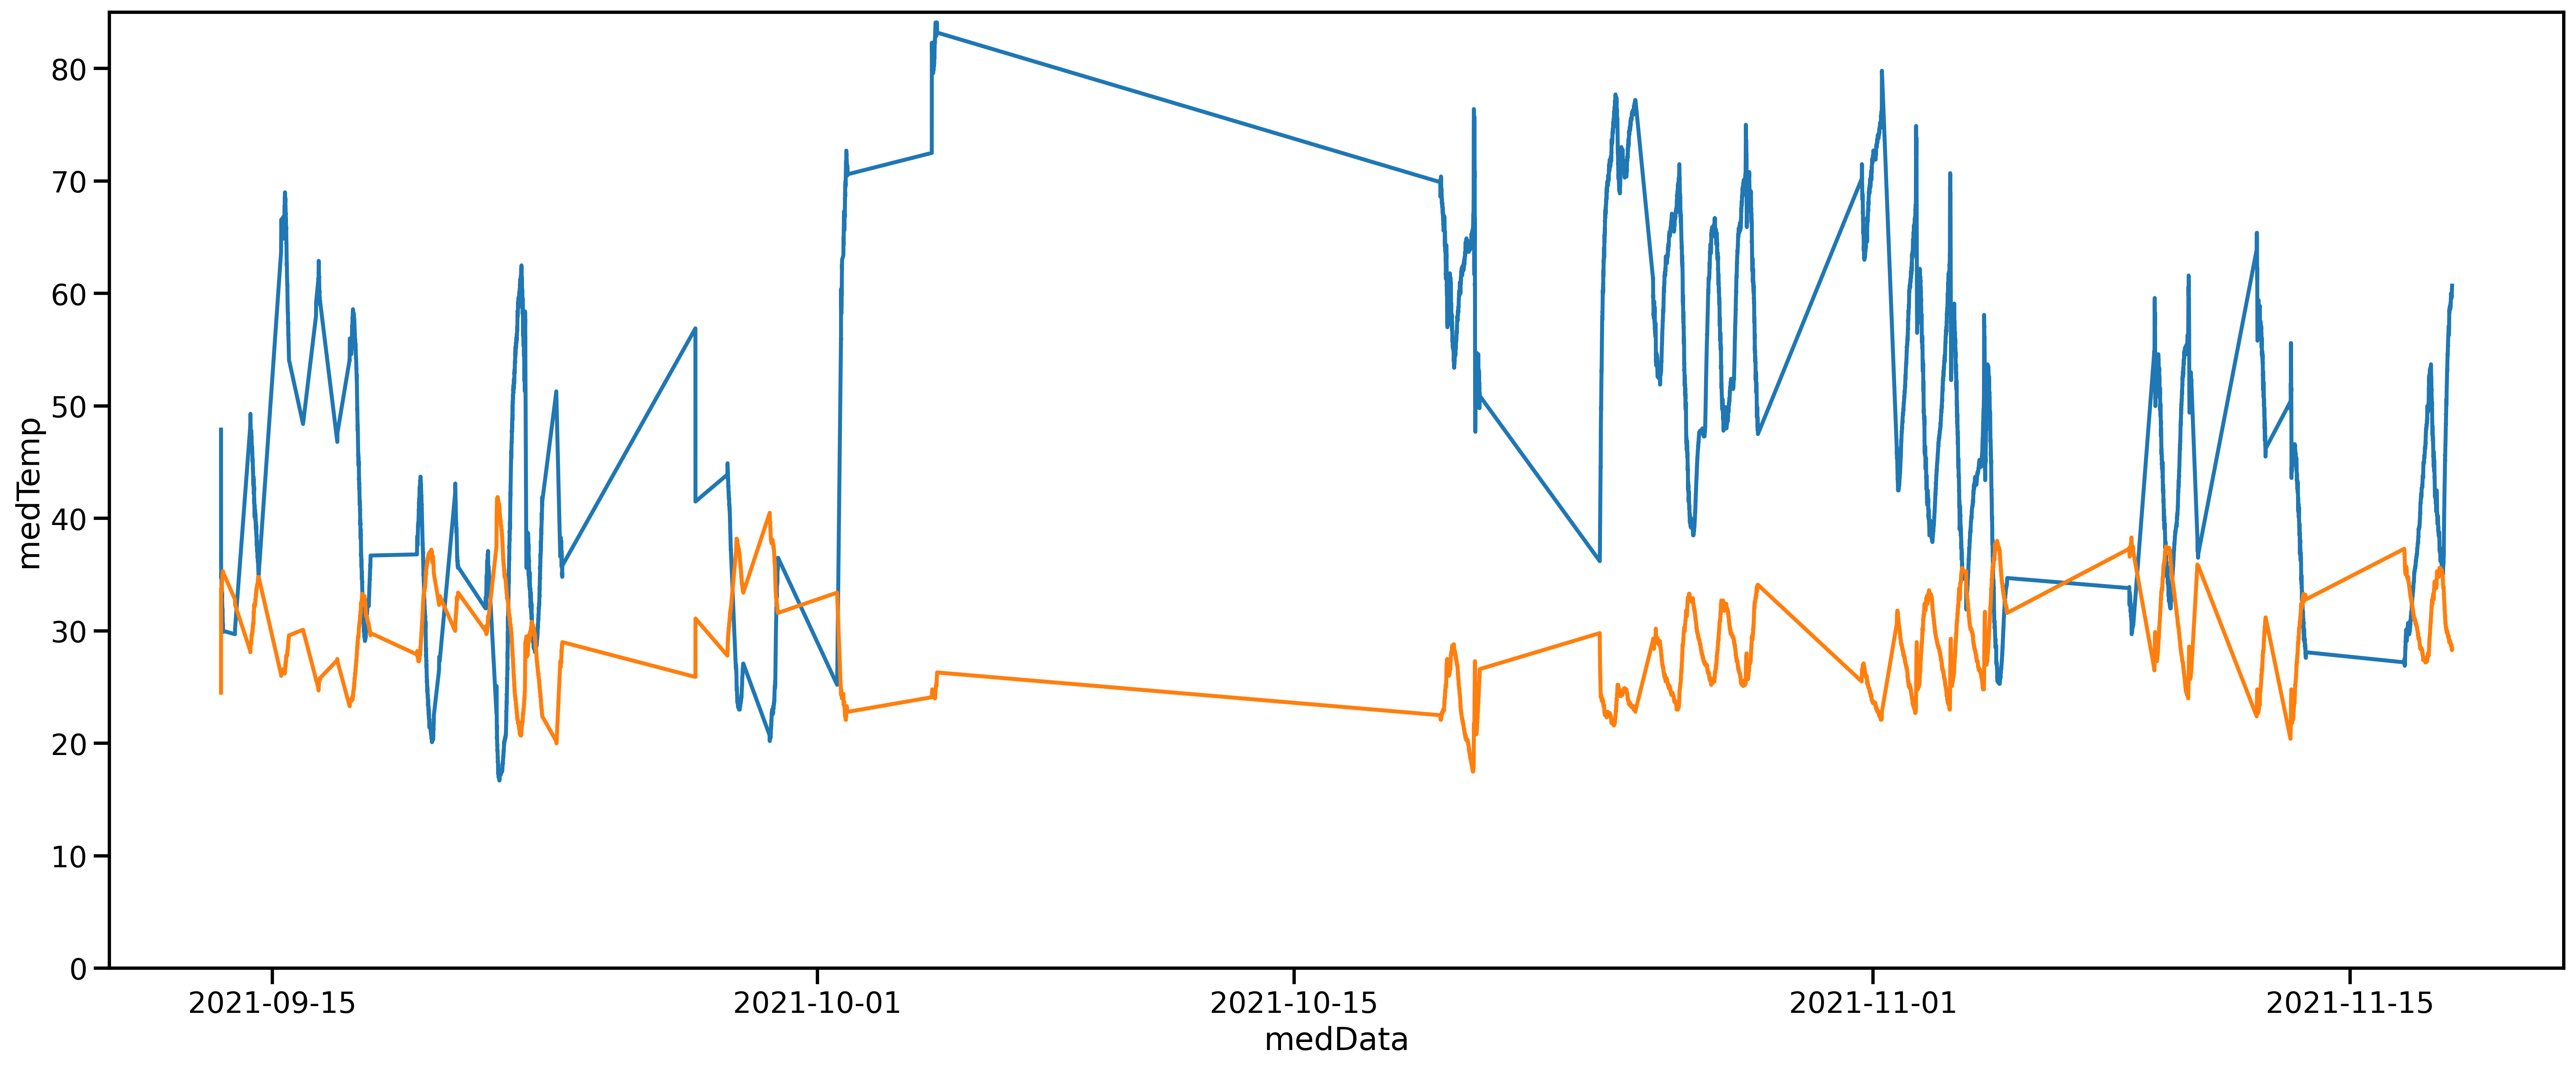

In [19]:
# Grafico contendo cada dado da Umidade e temperatura Registrado na base de Dados
fig, ax = plt.subplots(dpi=300)
seaborn.set_context("talk")
fig.set_size_inches(25, 10)
ax.set(ylim=(0,85))
res = seaborn.lineplot(x="medData", y="medUmidade", data=bdprint)
res = seaborn.lineplot(x="medData", y="medTemp", data=bdprint)

plt.show()

# Médias: Temperatura vs Co2

<ipython-input-20-e13ba1d6ee51>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp','medCO'].mean().plot(kind = 'bar' ,rot=0, ax=axs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

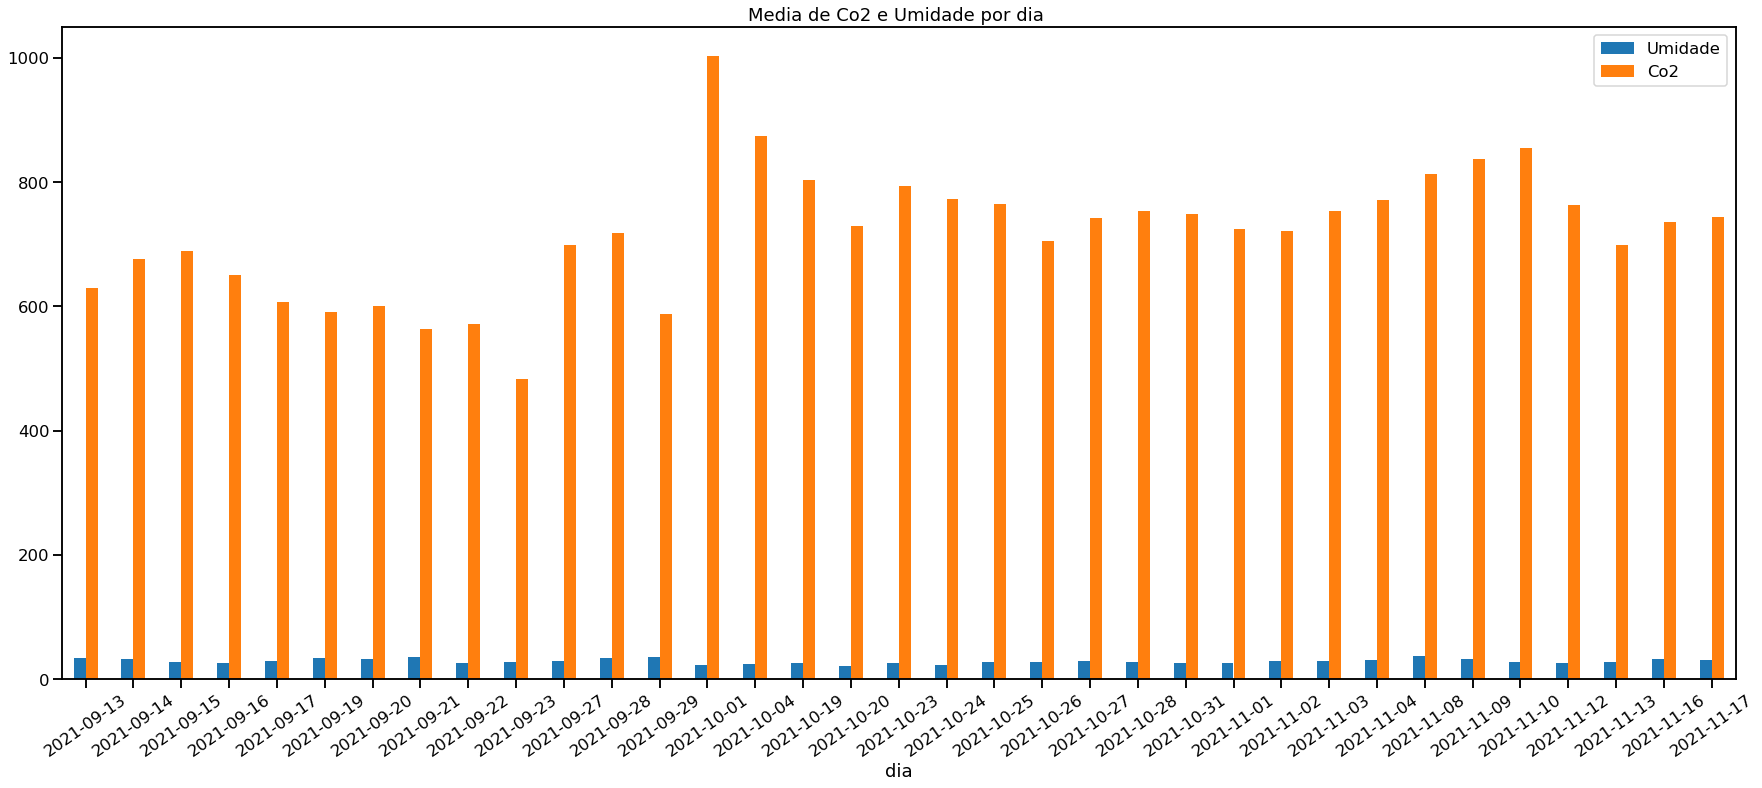

In [20]:
## Media de Co2 e Temperatura por dia
fig, axs = plt.subplots(figsize=(30, 12))
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp','medCO'].mean().plot(kind = 'bar' ,rot=0, ax=axs)
plt.xlabel("dia");

plt.title('Media de Co2 e Umidade por dia ')
plt.legend( ['Umidade', 'Co2'])
axs.set_ylim(ymin=0,ymax=1050)
plt.xticks(rotation=35)

In [21]:
## tabela gerada da função group By com calculo da media de Co2 e Temperatura por Dia.
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp','medCO'].mean()

<ipython-input-21-56f741ad71e7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp','medCO'].mean()


medTemp        medCO
medData                           
2021-09-13  34.038384   629.767677
2021-09-14  31.872566   676.238938
2021-09-15  27.149547   689.749245
2021-09-16  25.614286   650.440476
2021-09-17  29.082778   606.304107
2021-09-19  33.157661   591.168237
2021-09-20  32.078626   600.725191
2021-09-21  35.246579   563.340116
2021-09-22  26.017042   571.645329
2021-09-23  27.420930   482.744186
2021-09-27  29.800000   698.500000
2021-09-28  34.144418   718.655582
2021-09-29  36.040663   587.361446
2021-10-01  23.356481  1003.611111
2021-10-04  24.648372   874.708333
2021-10-19  25.176601   802.562282
2021-10-20  20.787985   729.831793
2021-10-23  26.522857   793.885714
2021-10-24  23.463710   773.321508
2021-10-25  27.371795   764.254808
2021-10-26  28.284655   705.879170
2021-10-27  28.788139   741.916976
2021-10-28  27.915108   753.621103
2021-10-31  25.435666   749.338600
2021-11-01  26.113001   724.946058
2021-11-02  28.429448   720.516871
2021-11-03  28.727970   753.476832
2021-11-04  31.393049   771.086265
2021-11-08  37.377987   813.723270
2021-11-09  33.053823   837.723751
2021-11-10  26.813673   854.138776
2021-11-12  26.331988   762.658385
2021-11-13  28.228708   698.794258
2021-11-16  32.873013   735.650647
2021-11-17  30.954303   744.110452

In [22]:
## Adicionar o os valores da media de temperatura e Co2 em uma lista 
aa = bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp','medCO'].mean()
##lista vazia
bb = []
### altera o valor do CO2 mutliplicando por 0.1 e  o adiciona na lista vazia
for val in range(0,35):
    bb.append(aa['medCO'][val] *0.1)
##remove a Coluna medCO com valores originais
aa = aa.drop(columns="medCO")
##Adiciona os valores modificados em a lista principal
aa['CO'] = bb

<ipython-input-22-3d416ae8f159>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aa = bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp','medCO'].mean()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

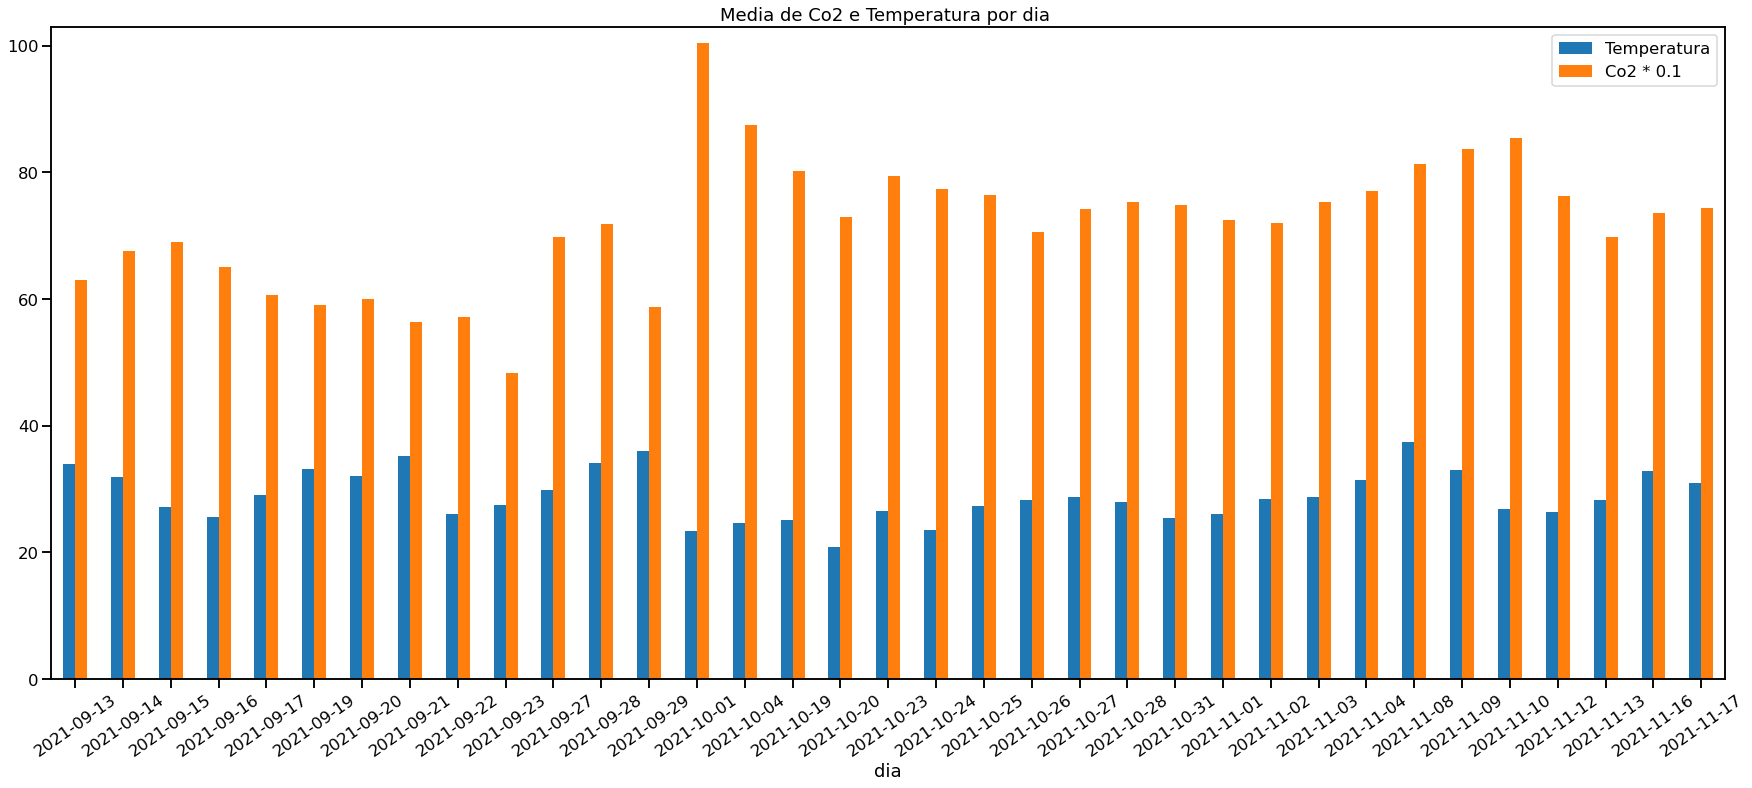

In [23]:
## Media de Co2*0.1 e Temperatura por dia
fig, axs = plt.subplots(figsize=(30, 12))
aa.plot(kind = 'bar' ,rot=0, ax=axs)
plt.xlabel("dia");

plt.title('Media de Co2 e Temperatura por dia ')
plt.legend( ['Temperatura', 'Co2 * 0.1'])
axs.set_ylim(ymin=0,ymax=103)
plt.xticks(rotation=35)

# Amplitude Termica

Text(0.5, 1.0, 'Temperatura')

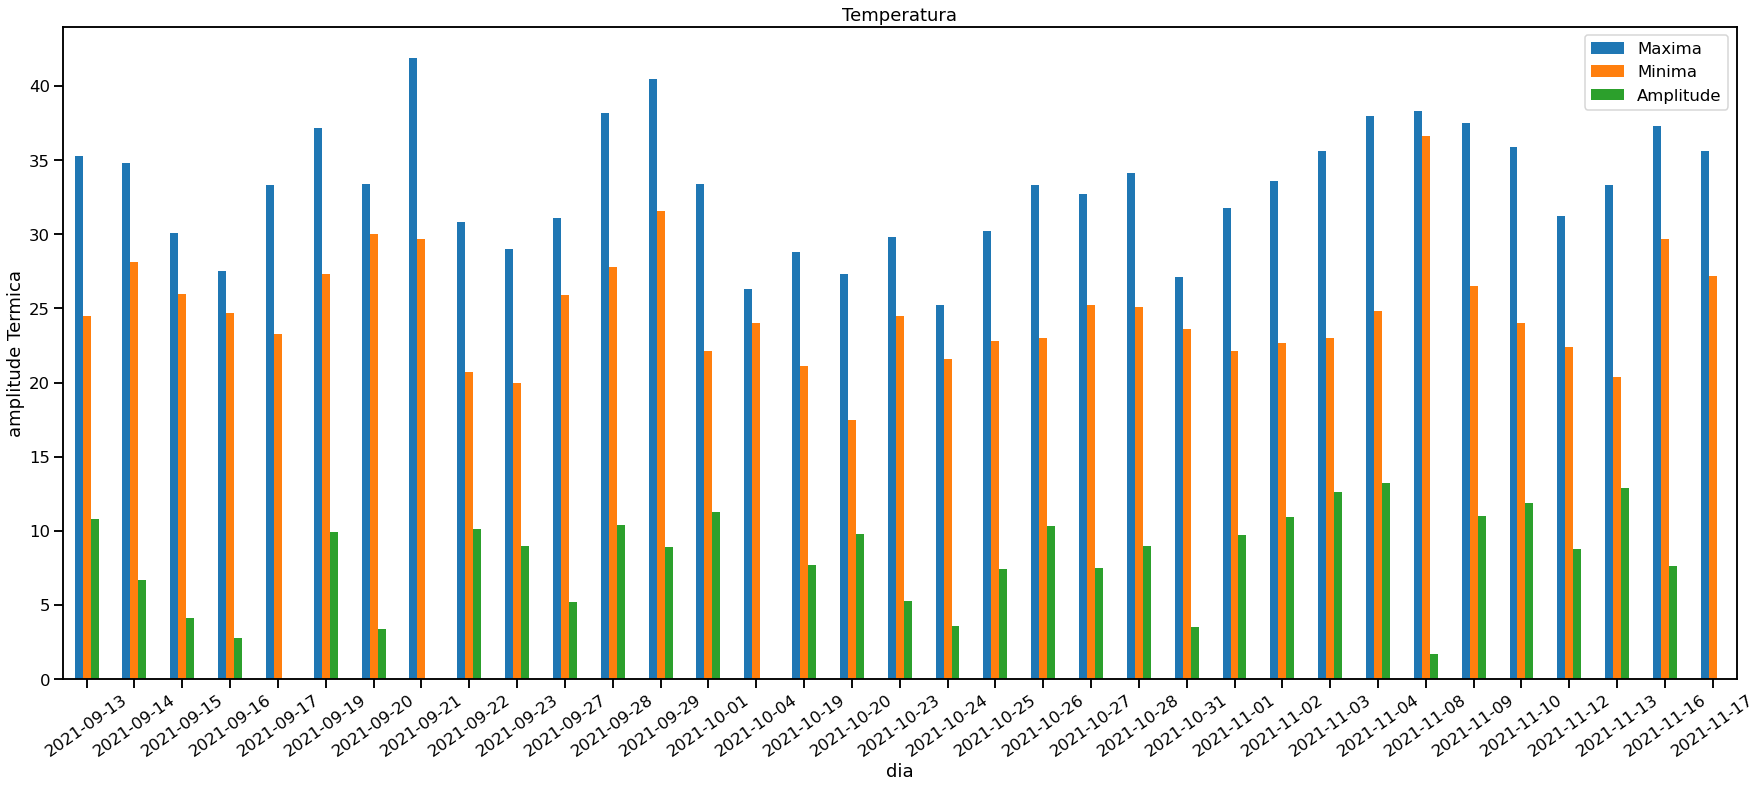

In [24]:
## amplitude Termica
bdprint.groupby([bdprint['medData'].dt.to_period('d')]).aggregate({'medTemp':[np.max,np.min,np.ptp]}).plot.bar(figsize=(30, 12))
plt.xlabel("dia");
plt.ylabel("amplitude Termica");
plt.legend( ['Maxima', 'Minima', 'Amplitude'])
plt.xticks(rotation=35)
plt.title('Temperatura')

In [25]:
## mostra cada valor
bdprint.groupby([bdprint['medData'].dt.to_period('d')]).aggregate({'medTemp':[np.max,np.min,np.ptp]})


medTemp            
              amax  amin   ptp
medData                       
2021-09-13    35.3  24.5  10.8
2021-09-14    34.8  28.1   6.7
2021-09-15    30.1  26.0   4.1
2021-09-16    27.5  24.7   2.8
2021-09-17    33.3  23.3   NaN
2021-09-19    37.2  27.3   9.9
2021-09-20    33.4  30.0   3.4
2021-09-21    41.9  29.7   NaN
2021-09-22    30.8  20.7  10.1
2021-09-23    29.0  20.0   9.0
2021-09-27    31.1  25.9   5.2
2021-09-28    38.2  27.8  10.4
2021-09-29    40.5  31.6   8.9
2021-10-01    33.4  22.1  11.3
2021-10-04    26.3  24.0   NaN
2021-10-19    28.8  21.1   7.7
2021-10-20    27.3  17.5   9.8
2021-10-23    29.8  24.5   5.3
2021-10-24    25.2  21.6   3.6
2021-10-25    30.2  22.8   7.4
2021-10-26    33.3  23.0  10.3
2021-10-27    32.7  25.2   7.5
2021-10-28    34.1  25.1   9.0
2021-10-31    27.1  23.6   3.5
2021-11-01    31.8  22.1   9.7
2021-11-02    33.6  22.7  10.9
2021-11-03    35.6  23.0  12.6
2021-11-04    38.0  24.8  13.2
2021-11-08    38.3  36.6   1.7
2021-11-09    37.5  26.5  11.0
2021-11-10    35.9  24.0  11.9
2021-11-12    31.2  22.4   8.8
2021-11-13    33.3  20.4  12.9
2021-11-16    37.3  29.7   7.6
2021-11-17    35.6  27.2   NaN

In [26]:
## Função mostra dados estatisticos pertinentes da amplitude termica 
bdprint.groupby([bdprint['medData'].dt.to_period('d')]).aggregate({'medTemp':[np.max,np.min,np.ptp]}).describe()


medTemp                      
            amax       amin        ptp
count  35.000000  35.000000  31.000000
mean   33.125714  24.842857   8.290323
std     4.132607   3.737669   3.214483
min    25.200000  17.500000   1.700000
25%    30.150000  22.550000   6.000000
50%    33.300000  24.500000   9.000000
75%    35.750000  26.850000  10.600000
max    41.900000  36.600000  13.200000

# Confiabilidade dos Dados

# Erro padrão

(array([18883, 18901, 18932, 18948], dtype=int64),
 <a list of 4 Text major ticklabel objects>)

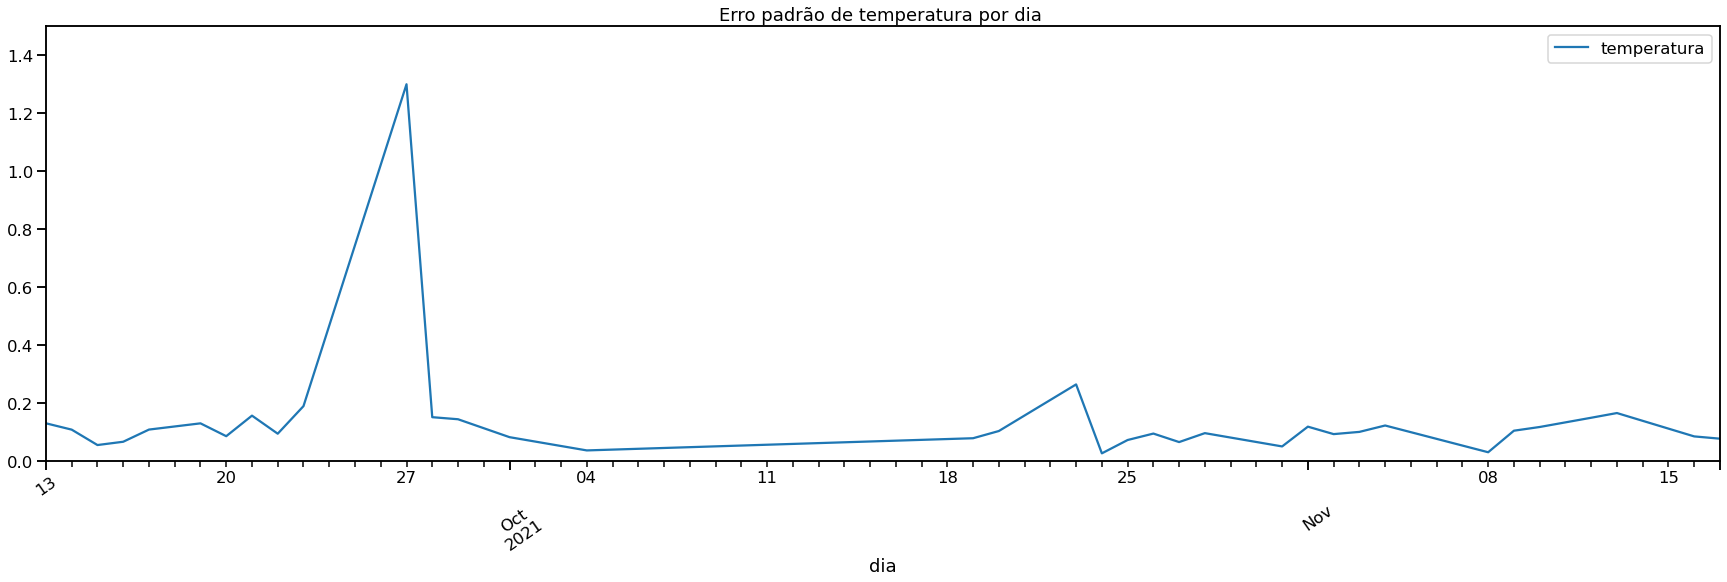

In [27]:
## Erro padrão de temperatura por dia
fig, axs = plt.subplots(figsize=(30, 8))
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp'].sem().plot(rot=0, ax=axs)
plt.xlabel("dia");
plt.title('Erro padrão de temperatura por dia ')
plt.legend( ['temperatura'])
axs.set_ylim(ymin=0,ymax=1.5)
plt.xticks(rotation=35)

In [28]:
### grafico gerado
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp'].sem()

medData
2021-09-13    0.130574
2021-09-14    0.108727
2021-09-15    0.055590
2021-09-16    0.066963
2021-09-17    0.108942
2021-09-19    0.130436
2021-09-20    0.086125
2021-09-21    0.157018
2021-09-22    0.094706
2021-09-23    0.189867
2021-09-27    1.300000
2021-09-28    0.151685
2021-09-29    0.144576
2021-10-01    0.082780
2021-10-04    0.037056
2021-10-19    0.079106
2021-10-20    0.103962
2021-10-23    0.264737
2021-10-24    0.026938
2021-10-25    0.072930
2021-10-26    0.095160
2021-10-27    0.065854
2021-10-28    0.096661
2021-10-31    0.050811
2021-11-01    0.119022
2021-11-02    0.093299
2021-11-03    0.100978
2021-11-04    0.123001
2021-11-08    0.030762
2021-11-09    0.105073
2021-11-10    0.117842
2021-11-12    0.149741
2021-11-13    0.165971
2021-11-16    0.085384
2021-11-17    0.077544
Freq: D, Name: medTemp, dtype: float64

(array([18883, 18901, 18932, 18948], dtype=int64),
 <a list of 4 Text major ticklabel objects>)

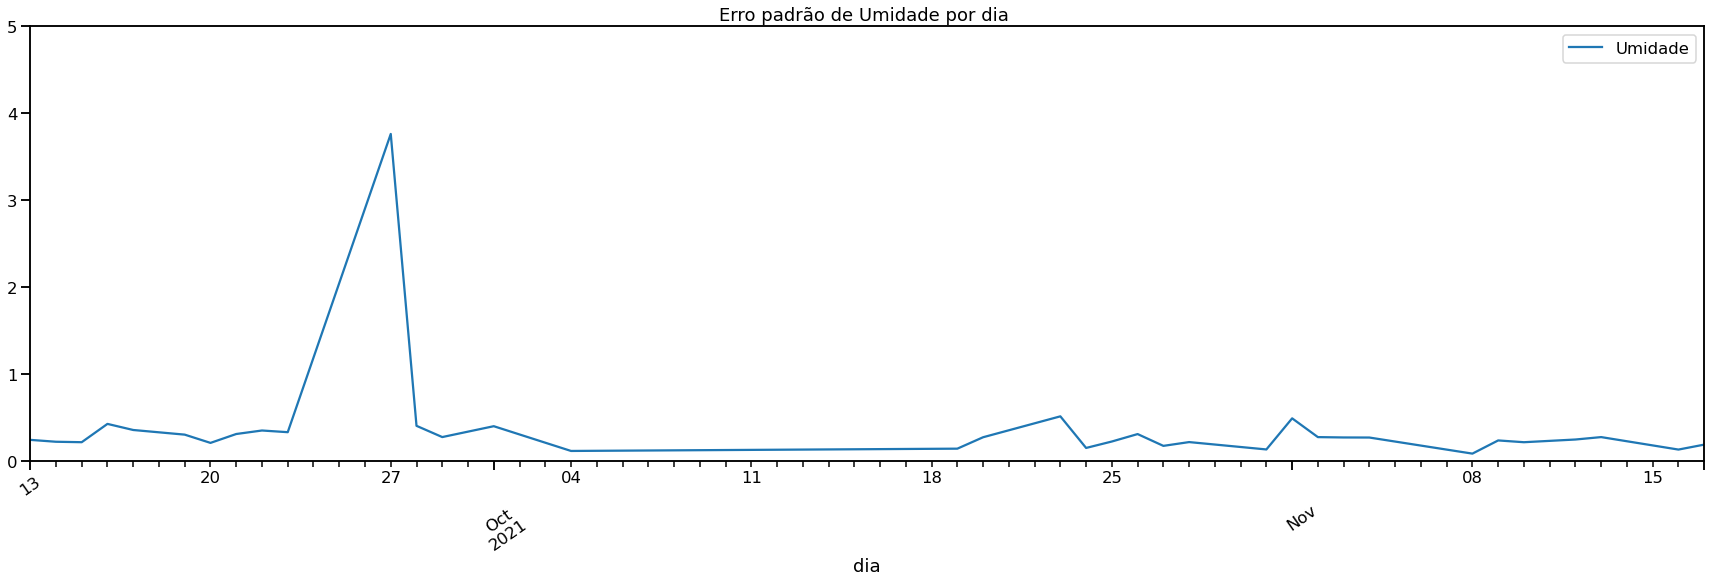

In [29]:
## Erro padrão de Umidade por dia

fig, axs = plt.subplots(figsize=(30, 8))
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medUmidade'].sem().plot(rot=0, ax=axs)
plt.xlabel("dia");
plt.title('Erro padrão de Umidade por dia ')
plt.legend( ['Umidade'])
axs.set_ylim(ymin=0,ymax=5)
plt.xticks(rotation=35)

In [30]:
### grafico gerado
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medUmidade'].sem()

medData
2021-09-13    0.244868
2021-09-14    0.223161
2021-09-15    0.217973
2021-09-16    0.428460
2021-09-17    0.358384
2021-09-19    0.304995
2021-09-20    0.209936
2021-09-21    0.312210
2021-09-22    0.352495
2021-09-23    0.333147
2021-09-27    3.761953
2021-09-28    0.406300
2021-09-29    0.277007
2021-10-01    0.401951
2021-10-04    0.117383
2021-10-19    0.143684
2021-10-20    0.274994
2021-10-23    0.515366
2021-10-24    0.151936
2021-10-25    0.225987
2021-10-26    0.311479
2021-10-27    0.175817
2021-10-28    0.219365
2021-10-31    0.134688
2021-11-01    0.492265
2021-11-02    0.276523
2021-11-03    0.272467
2021-11-04    0.271599
2021-11-08    0.086719
2021-11-09    0.238298
2021-11-10    0.217830
2021-11-12    0.248910
2021-11-13    0.276677
2021-11-16    0.133275
2021-11-17    0.190152
Freq: D, Name: medUmidade, dtype: float64

(array([18883, 18901, 18932, 18948], dtype=int64),
 <a list of 4 Text major ticklabel objects>)

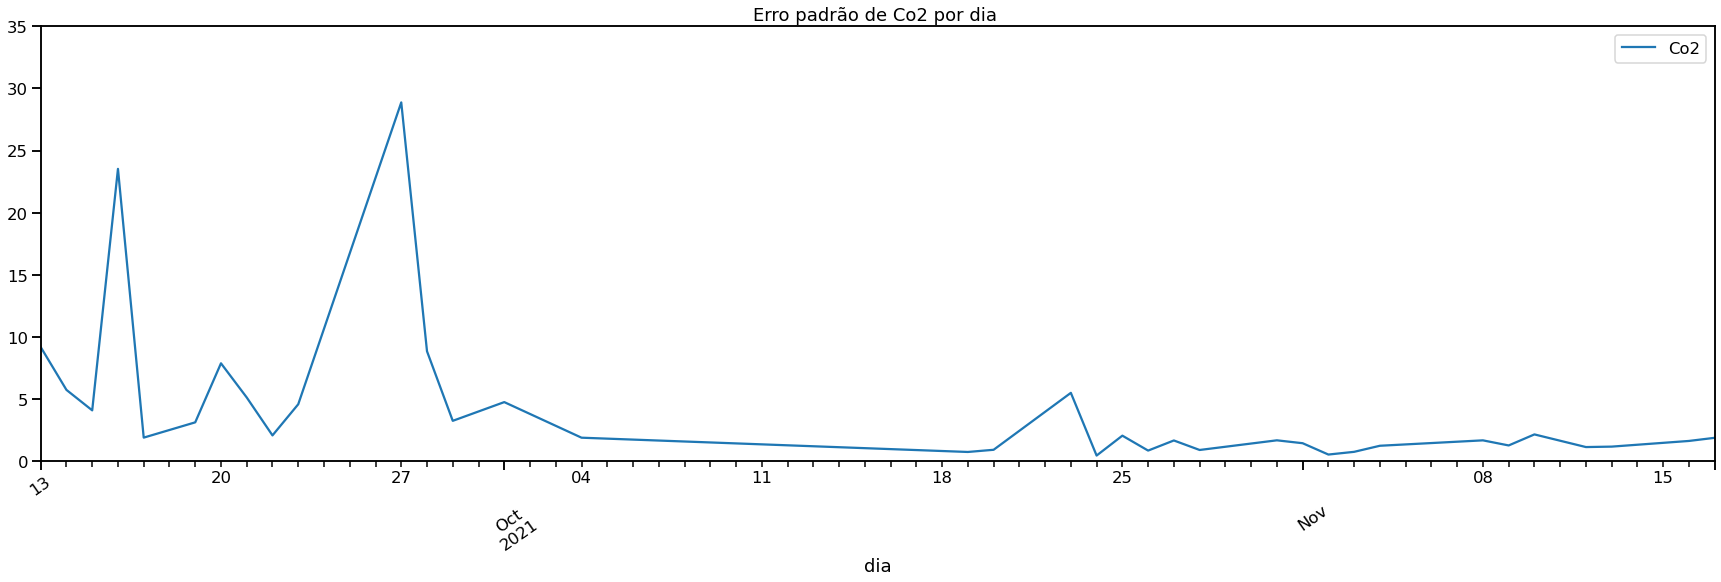

In [31]:
## Erro padrão de Co2 por dia

fig, axs = plt.subplots(figsize=(30, 8))
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medCO'].sem().plot(rot=0, ax=axs)
plt.xlabel("dia");
plt.title('Erro padrão de Co2 por dia ')
plt.legend( ['Co2'])
axs.set_ylim(ymin=0,ymax=35)
plt.xticks(rotation=35)

In [32]:
## grafico gerado
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medCO'].sem()

medData
2021-09-13     9.182991
2021-09-14     5.735528
2021-09-15     4.089279
2021-09-16    23.524754
2021-09-17     1.894474
2021-09-19     3.123989
2021-09-20     7.875969
2021-09-21     5.125846
2021-09-22     2.073710
2021-09-23     4.580521
2021-09-27    28.871843
2021-09-28     8.843641
2021-09-29     3.245655
2021-10-01     4.753256
2021-10-04     1.888771
2021-10-19     0.740134
2021-10-20     0.915372
2021-10-23     5.498017
2021-10-24     0.452216
2021-10-25     2.052310
2021-10-26     0.851153
2021-10-27     1.665413
2021-10-28     0.900051
2021-10-31     1.677366
2021-11-01     1.444429
2021-11-02     0.532352
2021-11-03     0.751097
2021-11-04     1.239684
2021-11-08     1.674916
2021-11-09     1.265162
2021-11-10     2.152923
2021-11-12     1.134603
2021-11-13     1.170545
2021-11-16     1.626786
2021-11-17     1.879044
Freq: D, Name: medCO, dtype: float64

# Desvio Padrão

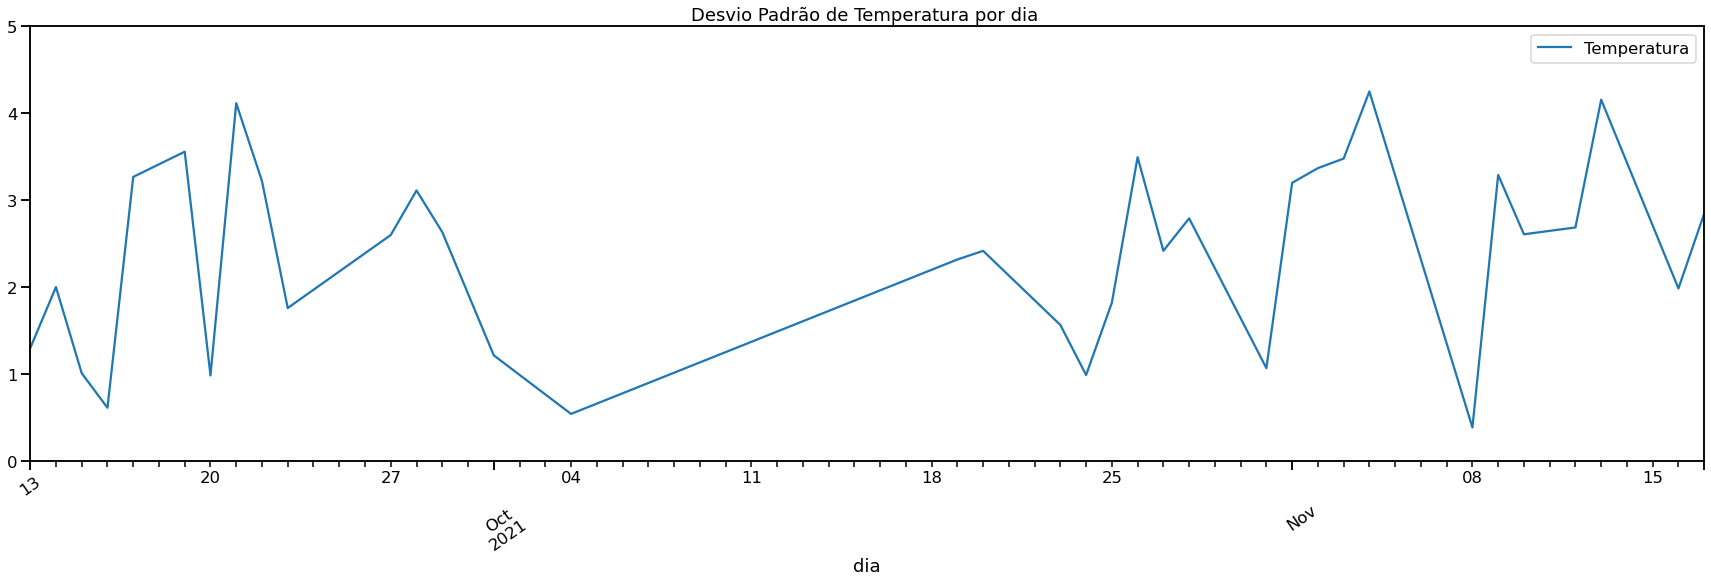

In [33]:
## Desvio padrão de Temperatura por dia

fig, axs = plt.subplots(figsize=(30, 8))
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp'].std().plot(rot=0, ax=axs)
plt.xlabel("dia");
plt.title('Desvio Padrão de Temperatura por dia ')
plt.legend( ['Temperatura'])
axs.set_ylim(ymin=0,ymax=5)
plt.xticks(rotation=35)
plt.show()

In [34]:
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp'].std()

medData
2021-09-13    1.299192
2021-09-14    2.001874
2021-09-15    1.011371
2021-09-16    0.613727
2021-09-17    3.268245
2021-09-19    3.557816
2021-09-20    0.985745
2021-09-21    4.115541
2021-09-22    3.220018
2021-09-23    1.760756
2021-09-27    2.600000
2021-09-28    3.112318
2021-09-29    2.634308
2021-10-01    1.216612
2021-10-04    0.543341
2021-10-19    2.318493
2021-10-20    2.418085
2021-10-23    1.566203
2021-10-24    0.990856
2021-10-25    1.821780
2021-10-26    3.495110
2021-10-27    2.418740
2021-10-28    2.791491
2021-10-31    1.069440
2021-11-01    3.200333
2021-11-02    3.369097
2021-11-03    3.478967
2021-11-04    4.250204
2021-11-08    0.387894
2021-11-09    3.290999
2021-11-10    2.608543
2021-11-12    2.687006
2021-11-13    4.155900
2021-11-16    1.985981
2021-11-17    2.847047
Freq: D, Name: medTemp, dtype: float64

(array([18883, 18901, 18932, 18948], dtype=int64),
 <a list of 4 Text major ticklabel objects>)

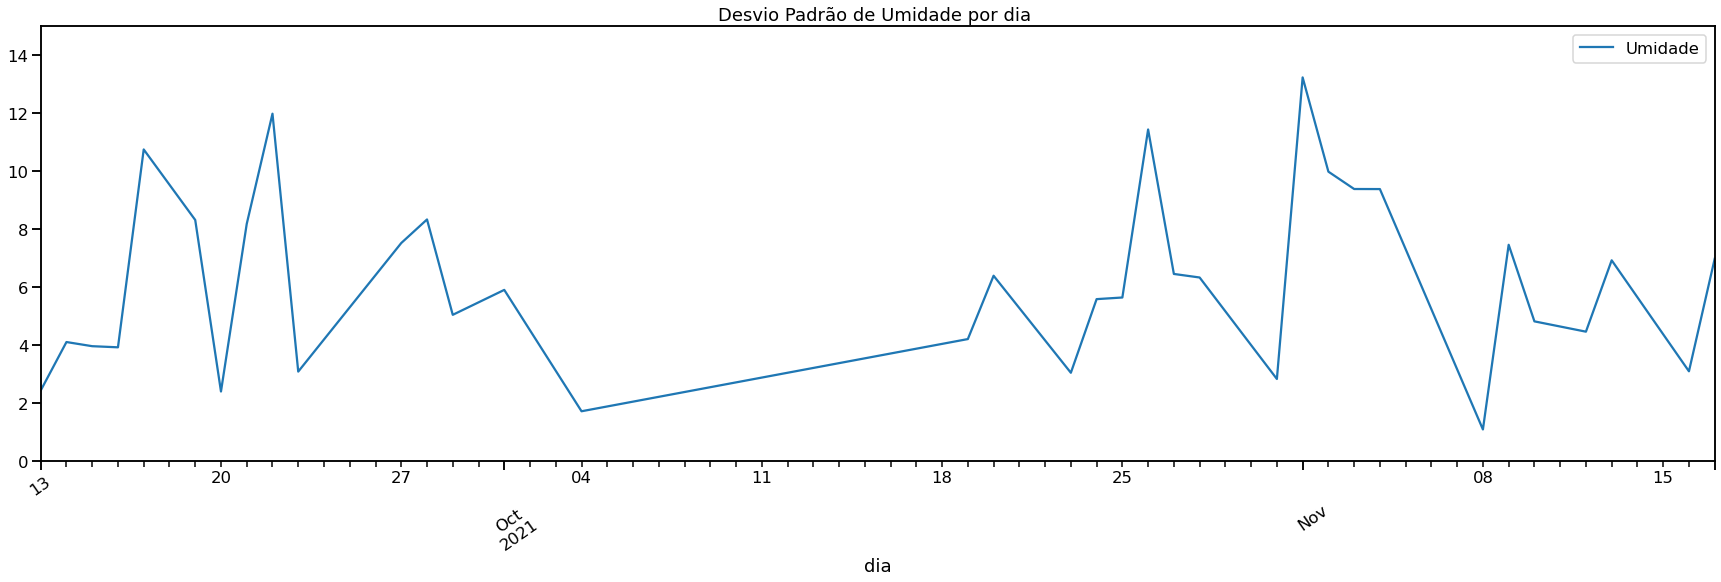

In [35]:
## Desvio padrão de Umidade por dia

fig, axs = plt.subplots(figsize=(30, 8))
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medUmidade'].std().plot(rot=0, ax=axs)
plt.xlabel("dia");
plt.title('Desvio Padrão de Umidade por dia ')
plt.legend( ['Umidade'])
axs.set_ylim(ymin=0,ymax=15)
plt.xticks(rotation=35)

In [36]:
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medUmidade'].std()

medData
2021-09-13     2.436402
2021-09-14     4.108829
2021-09-15     3.965672
2021-09-16     3.926899
2021-09-17    10.751525
2021-09-19     8.319159
2021-09-20     2.402823
2021-09-21     8.183237
2021-09-22    11.984846
2021-09-23     3.089480
2021-09-27     7.523906
2021-09-28     8.336586
2021-09-29     5.047317
2021-10-01     5.907448
2021-10-04     1.721170
2021-10-19     4.211191
2021-10-20     6.396203
2021-10-23     3.048948
2021-10-24     5.588687
2021-10-25     5.645155
2021-10-26    11.440244
2021-10-27     6.457528
2021-10-28     6.335064
2021-10-31     2.834852
2021-11-01    13.236346
2021-11-02     9.985514
2021-11-03     9.387266
2021-11-04     9.384921
2021-11-08     1.093490
2021-11-09     7.463710
2021-11-10     4.821877
2021-11-12     4.466538
2021-11-13     6.927994
2021-11-16     3.099899
2021-11-17     6.981444
Freq: D, Name: medUmidade, dtype: float64

(array([18883, 18901, 18932, 18948], dtype=int64),
 <a list of 4 Text major ticklabel objects>)

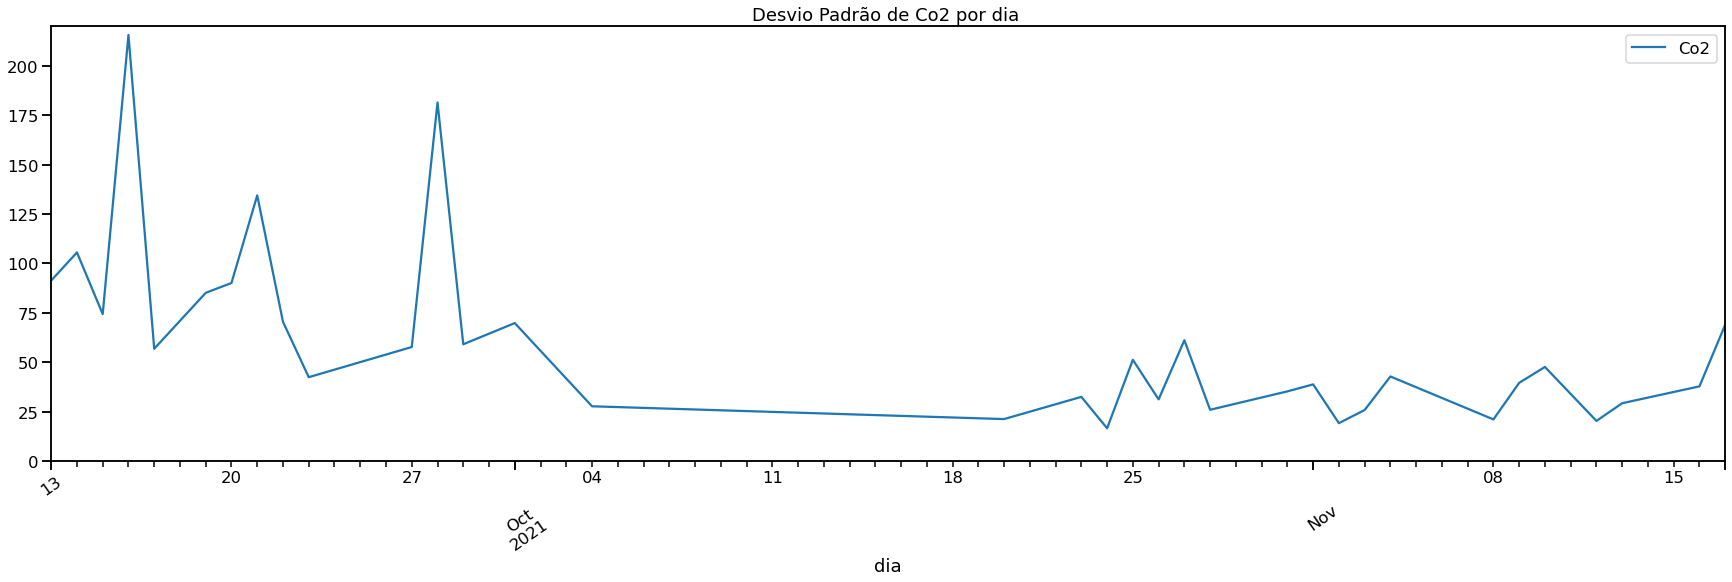

In [37]:
## Desvio padrão de Co2 por dia

fig, axs = plt.subplots(figsize=(30, 8))
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medCO'].std().plot(rot=0, ax=axs)
plt.xlabel("dia");
plt.title('Desvio Padrão de Co2 por dia ')
plt.legend( ['Co2'])
axs.set_ylim(ymin=0,ymax=220)
plt.xticks(rotation=35)

In [38]:
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medCO'].std()

medData
2021-09-13     91.369605
2021-09-14    105.602269
2021-09-15     74.397910
2021-09-16    215.607930
2021-09-17     56.865774
2021-09-19     85.153769
2021-09-20     90.144589
2021-09-21    134.449692
2021-09-22     70.506139
2021-09-23     42.478004
2021-09-27     57.743687
2021-09-28    181.456338
2021-09-29     59.138647
2021-10-01     69.858306
2021-10-04     27.759149
2021-10-19     21.692366
2021-10-20     21.291004
2021-10-23     32.526705
2021-10-24     16.633918
2021-10-25     51.266691
2021-10-26     31.261761
2021-10-27     61.168522
2021-10-28     25.992618
2021-10-31     35.304468
2021-11-01     38.838769
2021-11-02     19.223723
2021-11-03     25.877453
2021-11-04     42.836402
2021-11-08     21.119884
2021-11-09     39.626034
2021-11-10     47.656975
2021-11-12     20.359726
2021-11-13     29.310404
2021-11-16     37.838080
2021-11-17     69.014903
Freq: D, Name: medCO, dtype: float64

Text(0.5, 1.0, 'Temperatura')

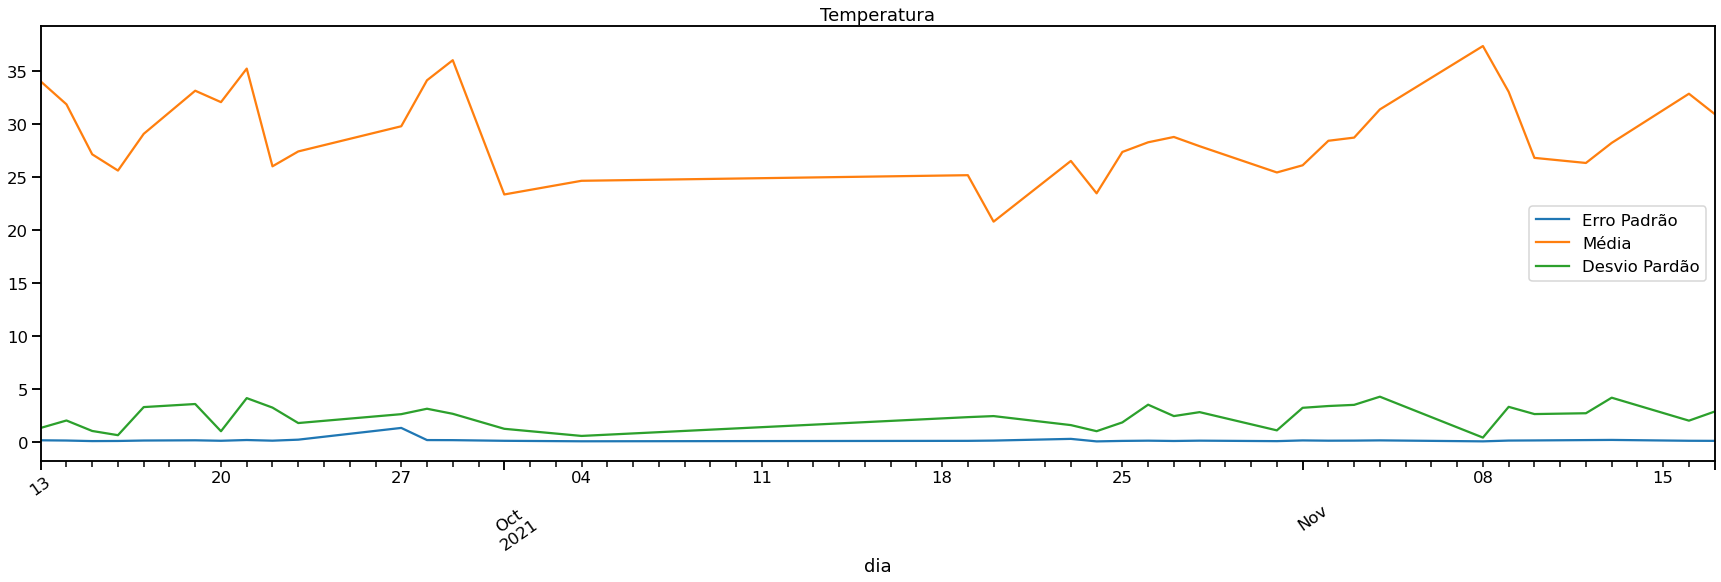

In [39]:
fig, axs = plt.subplots(figsize=(30, 8))
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp'].sem().plot(rot=0, ax=axs)
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp'].mean().plot(rot=0, ax=axs)
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medTemp'].std().plot(rot=0, ax=axs)
plt.xlabel("dia");
plt.legend( ['Erro Padrão', 'Média', 'Desvio Pardão'])
plt.xticks(rotation=35)
plt.title('Temperatura')

Text(0.5, 1.0, 'Umidade')

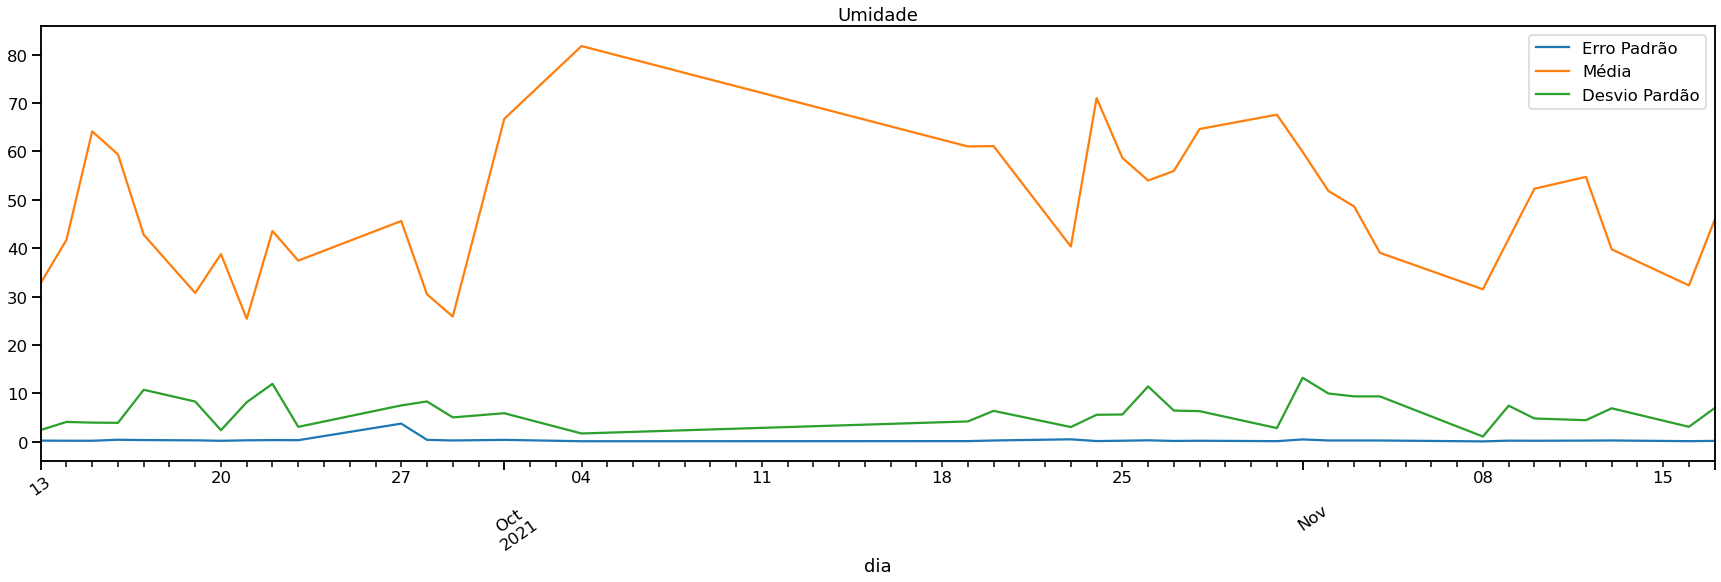

In [40]:
fig, axs = plt.subplots(figsize=(30, 8))
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medUmidade'].sem().plot(rot=0, ax=axs)
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medUmidade'].mean().plot(rot=0, ax=axs)
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medUmidade'].std().plot(rot=0, ax=axs)
plt.xlabel("dia");
plt.legend( ['Erro Padrão', 'Média', 'Desvio Pardão'])
plt.xticks(rotation=35)
plt.title('Umidade')

Text(0.5, 1.0, 'CO2')

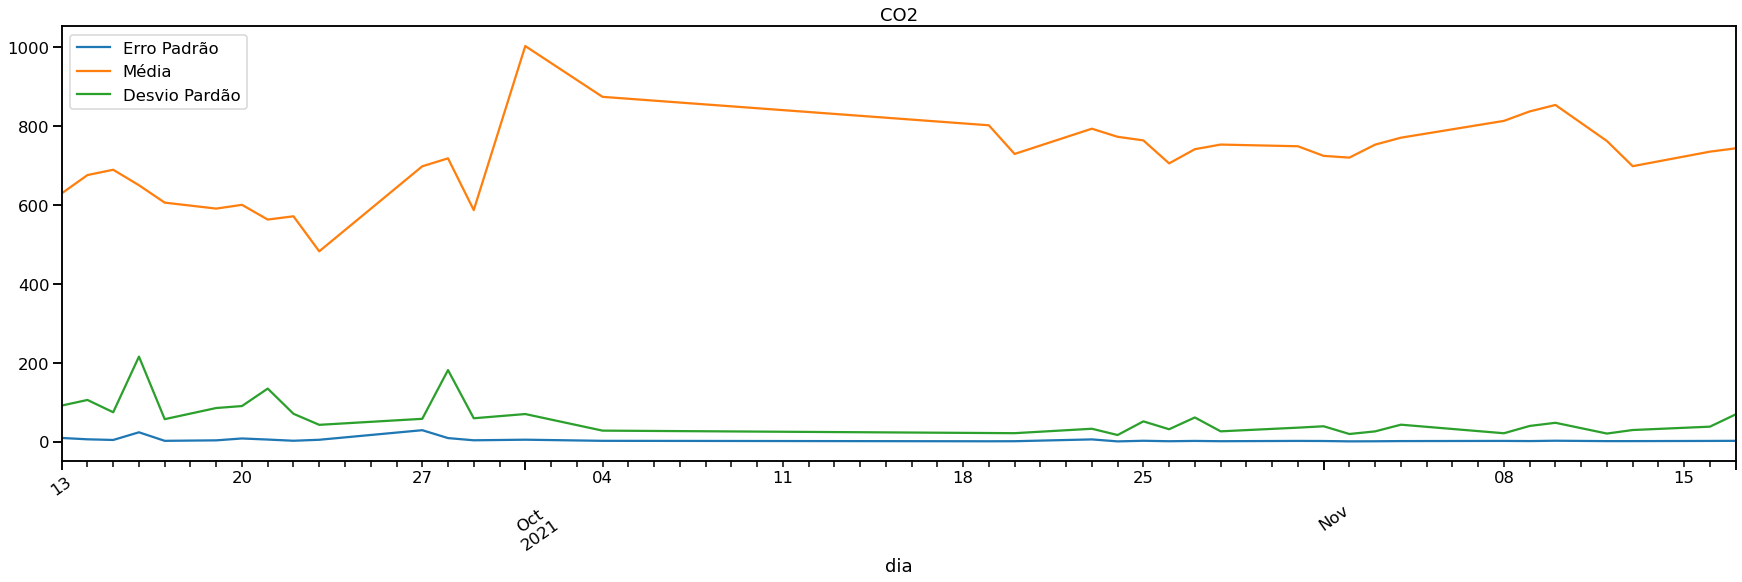

In [41]:
fig, axs = plt.subplots(figsize=(30, 8))
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medCO'].sem().plot(rot=0, ax=axs)
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medCO'].mean().plot(rot=0, ax=axs)
bdprint.groupby([bdprint['medData'].dt.to_period('d')])['medCO'].std().plot(rot=0, ax=axs)
plt.xlabel("dia");
plt.legend( ['Erro Padrão', 'Média', 'Desvio Pardão'])
plt.xticks(rotation=35)
plt.title('CO2')

# FIM
